# Exploratory Data Analysis of Autism Spectrum Disorder

## Data Dictionary

Details of variables mapping to the Q-Chat-10 screening methods

Variable in Dataset	Corresponding Q-chat-10-Toddler Features

1.  A1	Does your child look at you when you call his/her name?
2.  A2	How easy is it for you to get eye contact with your child? 
3.  A3	Does your child point to indicate that s/he wants something? (e.g. a toy that is 
out of reach) 
4.  A4	Does your child point to share interest with you? (e.g. pointing at an 
interesting sight) 
5.  A5	Does your child pretend? (e.g. care for dolls, talk on a toy phone) 
6.  A6	Does your child follow where you’re looking? 
7.  A7	If you or someone else in the family is visibly upset, does your child show signs 
of wanting to comfort them? (e.g. stroking hair, hugging them)
8.  A8	Would you describe your child’s first words as: 
9.  A9	Does your child use simple gestures? (e.g. wave goodbye) 
10. A10	Does your child stare at nothing with no apparent purpose? 

**Other Features**
1. Age	Number 	Toddlers (months)
2. Score by Q-chat-10 	Number	1-10 (Less than or equal to 3) --> no ASD traits; > 3 ASD traits
3. Sex	Character:	Male or Female 
4. Ethnicity:	String	List of common ethnicities in text format 
5. Born with jaundice:	Boolean  (yes or no)	Whether the case was born with jaundice
6. Family member with ASD history:	Boolean  (yes or no)	Whether any immediate family member has a PDD 
7. Who is completing the test:	String 	Parent, self, caregiver, medical staff, clinician ,etc.
8. Why_are_you_taken_the_screening	String:	Use input textbox 
9. Class variable: 	String 	ASD traits or No ASD traits (automatically assigned by the ASDTests app). (Yes / No)

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [3]:
df = pd.read_csv("Toddler Autism dataset July 2018.csv")

In [4]:
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [5]:
df.shape

(1054, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [7]:
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

In [8]:
df.isnull().mean() * 100

Case_No                   0.0
A1                        0.0
A2                        0.0
A3                        0.0
A4                        0.0
A5                        0.0
A6                        0.0
A7                        0.0
A8                        0.0
A9                        0.0
A10                       0.0
Age_Mons                  0.0
Qchat-10-Score            0.0
Sex                       0.0
Ethnicity                 0.0
Jaundice                  0.0
Family_mem_with_ASD       0.0
Who completed the test    0.0
Class/ASD Traits          0.0
dtype: float64

In [9]:
df["Ethnicity"].value_counts()

White European    334
asian             299
middle eastern    188
south asian        60
black              53
Hispanic           40
Others             35
Latino             26
mixed               8
Pacifica            8
Native Indian       3
Name: Ethnicity, dtype: int64

In [10]:
df["Ethnicity"] = df["Ethnicity"].replace("mixed", "Others") 
df["Ethnicity"] = df["Ethnicity"].replace("Native Indian", "South Asian")
df["Ethnicity"] = df["Ethnicity"].replace("asian", "Other Asians")
df["Ethnicity"] = df["Ethnicity"].replace("middle eastern", "Middle Eastern")
df["Ethnicity"] = df["Ethnicity"].replace("south asian", "South Asian")
df["Ethnicity"] = df["Ethnicity"].replace("black", "Black")

In [11]:
df["Ethnicity"].value_counts()

White European    334
Other Asians      299
Middle Eastern    188
South Asian        63
Black              53
Others             43
Hispanic           40
Latino             26
Pacifica            8
Name: Ethnicity, dtype: int64

In [12]:
df["Who completed the test"].unique()

array(['family member', 'Health Care Professional',
       'Health care professional', 'Self', 'Others'], dtype=object)

In [13]:
df["Who completed the test"] = df["Who completed the test"].replace("family member", "Family Member")
df["Who completed the test"] = df["Who completed the test"].replace("Health care professional", "Health Care Professional")

In [14]:
df["Who completed the test"].value_counts()

Family Member               1018
Health Care Professional      29
Self                           4
Others                         3
Name: Who completed the test, dtype: int64

In [15]:
df["Age Months"] = df["Age_Mons"]
df["Family Member with ASD"] = df["Family_mem_with_ASD"]
df["ASD Traits"] = df["Class/ASD Traits "]

In [16]:
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits ',
       'Age Months', 'Family Member with ASD', 'ASD Traits'],
      dtype='object')

In [17]:
df.drop(columns=["Case_No", "Age_Mons", "Family_mem_with_ASD", "Class/ASD Traits "], axis=1, inplace=True)

In [18]:
cat_df = df[["Sex", "Ethnicity", "Jaundice", "Who completed the test", "Family Member with ASD", "ASD Traits"]]
num_df = df[["A1", "A2", "A3", "A4","A5","A6", "A7", "A8", "A9", "A10", "Qchat-10-Score", "Age Months"]]

In [19]:
for col in cat_df.columns:
    print(col,"\n", cat_df[col].unique(), "\n")

Sex 
 ['f' 'm'] 

Ethnicity 
 ['Middle Eastern' 'White European' 'Hispanic' 'Black' 'Other Asians'
 'South Asian' 'Others' 'Latino' 'Pacifica'] 

Jaundice 
 ['yes' 'no'] 

Who completed the test 
 ['Family Member' 'Health Care Professional' 'Self' 'Others'] 

Family Member with ASD 
 ['no' 'yes'] 

ASD Traits 
 ['No' 'Yes'] 



In [20]:
df.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Qchat-10-Score,Age Months
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,5.212524,27.867173
std,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,2.907304,7.980354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,23.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,5.000000,30.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,36.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,36.000000


C:\Users\Babar\AppData\Local\Temp\ipykernel_6712\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

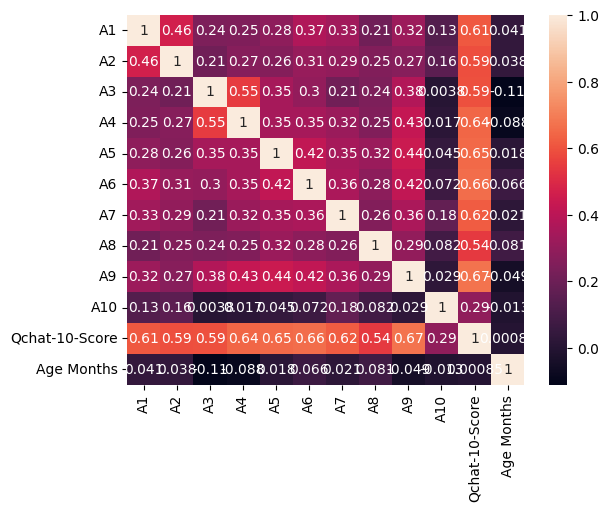

In [21]:
sns.heatmap(df.corr(), annot=True)

# What Features from A1 to A10 contributes the most in ASD tarits?

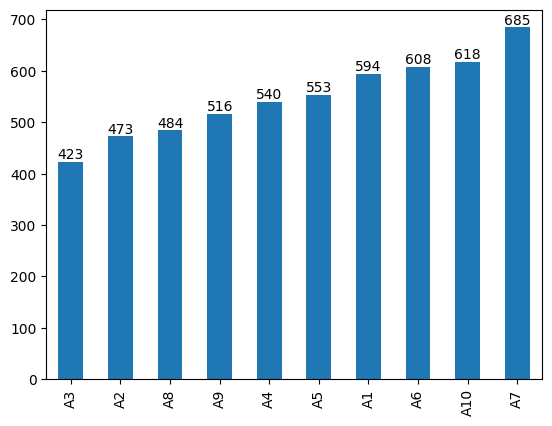

In [22]:
ft_sum =  num_df.sum()
ax = ft_sum.iloc[0:10].sort_values(ascending=True).plot(kind="bar")
ax.bar_label(ax.containers[0])
plt.show();

# Univariate Analysis

For Categorical Variables

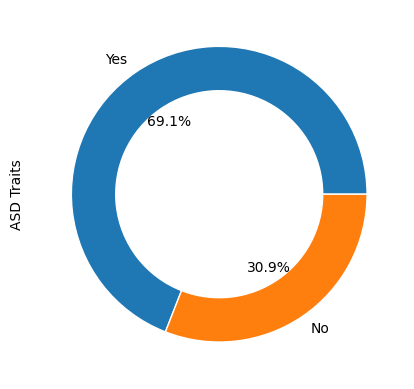

In [23]:
df["ASD Traits"].value_counts().plot(kind="pie", autopct="%1.1f%%", wedgeprops=dict(width=.3, edgecolor='w'));

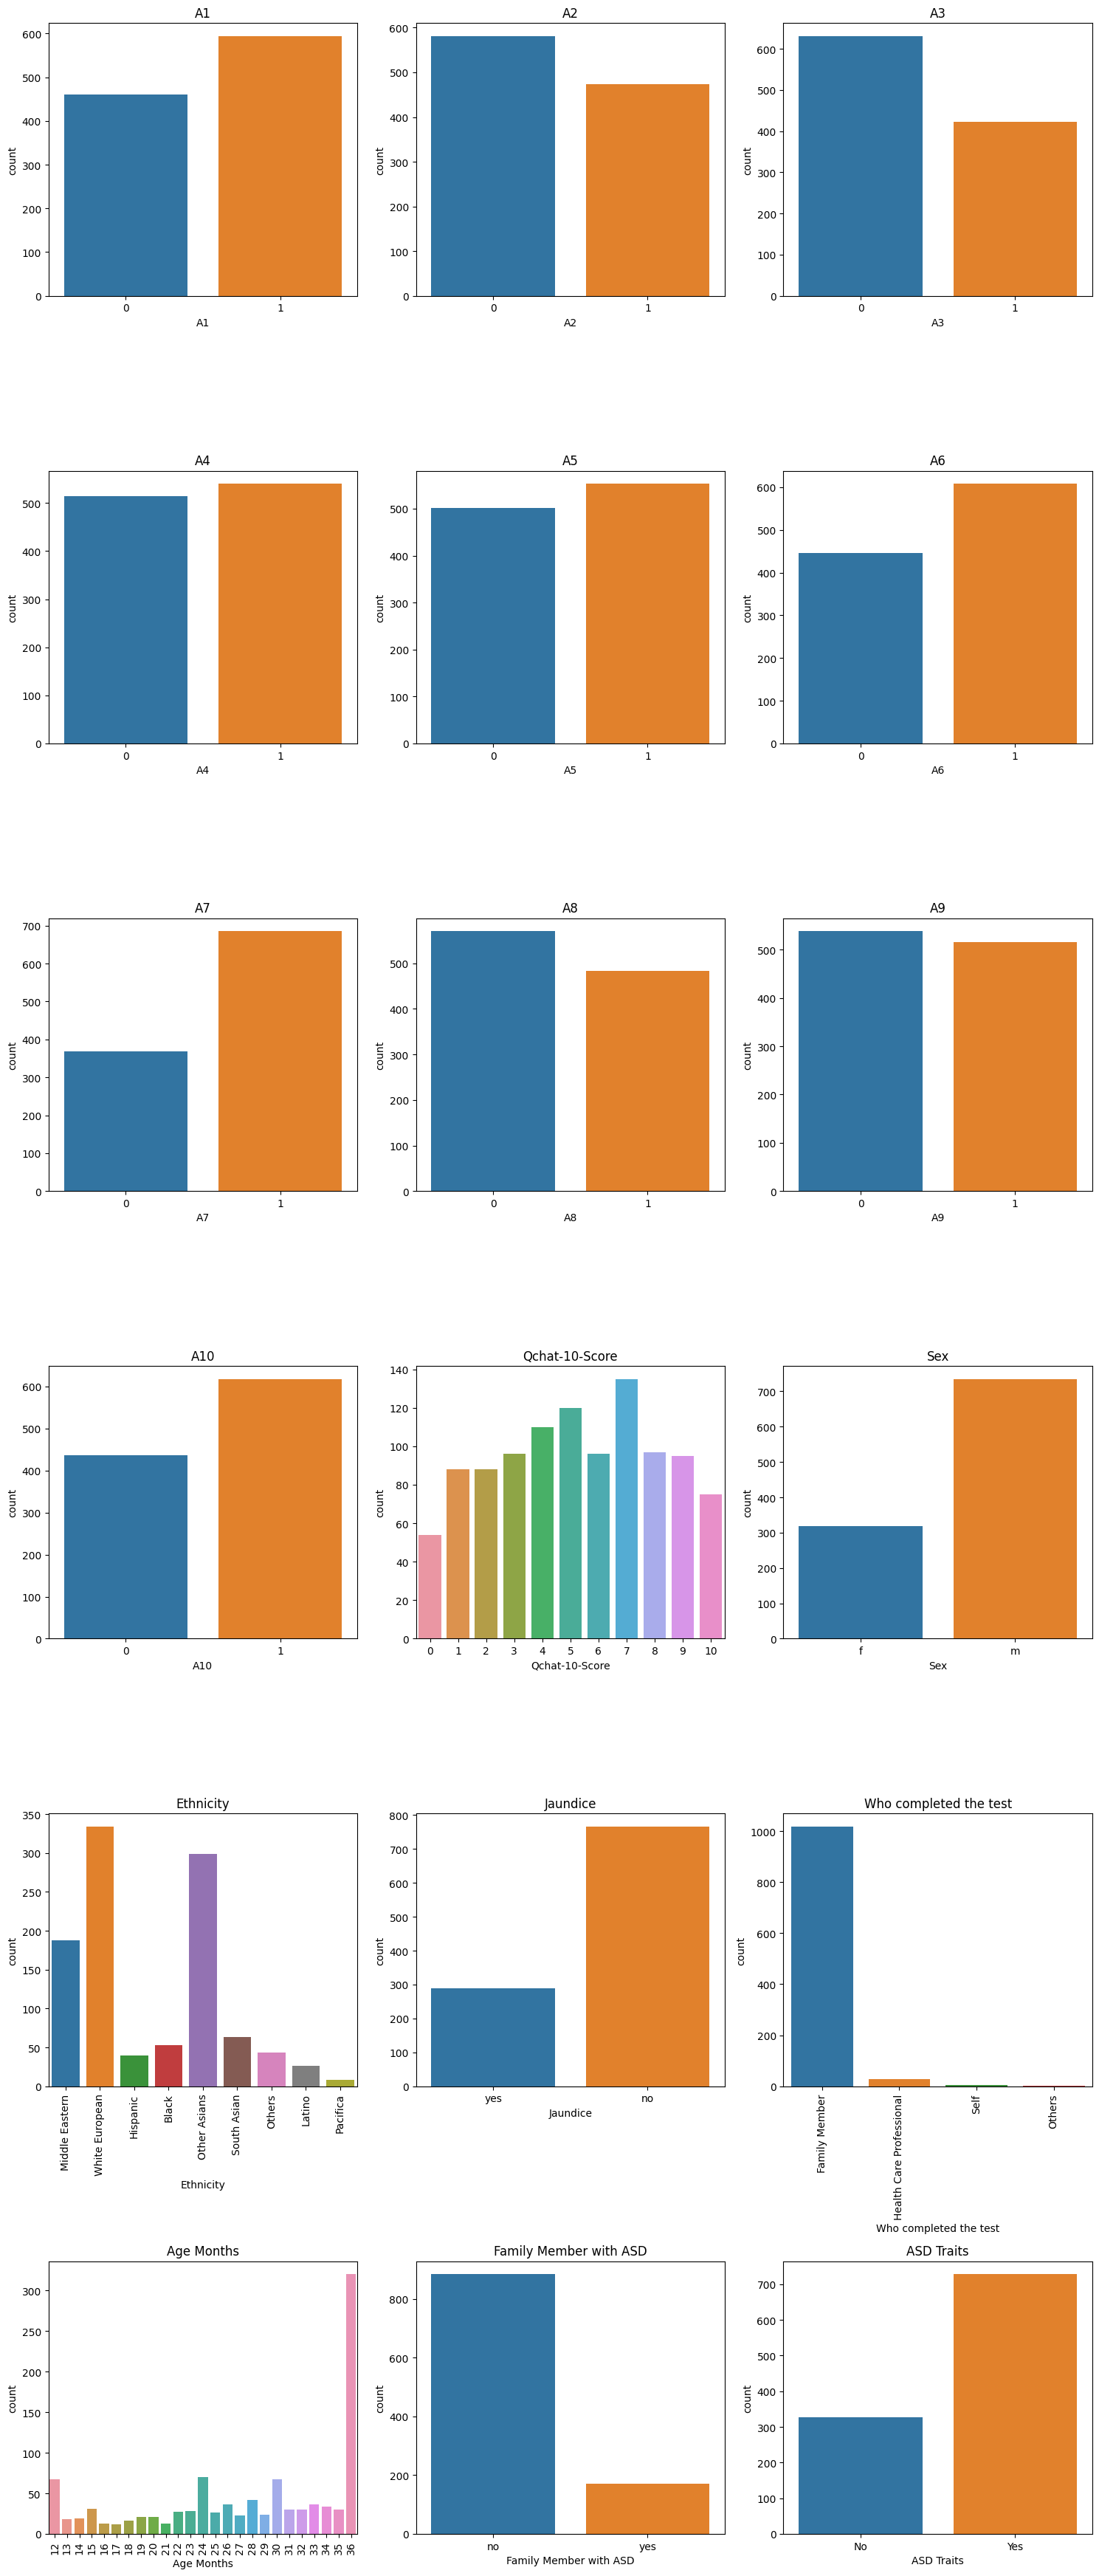

In [24]:
fig, axes = plt.subplots(6, 3, figsize=(15, 35))

axes = axes.ravel()
for i, col in enumerate(df.columns):
    sns.countplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)
    if col == "Who completed the test" or col == "Ethnicity" or col == "Age Months":
        axes[i].tick_params(axis="x", labelrotation=90)
plt.tight_layout()
plt.show()

C:\Users\Babar\AppData\Local\Temp\ipykernel_6712\462697146.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=num_df[col], ax=axes[i])
C:\Users\Babar\AppData\Local\Temp\ipykernel_6712\462697146.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=num_df[col], ax=axes[i])


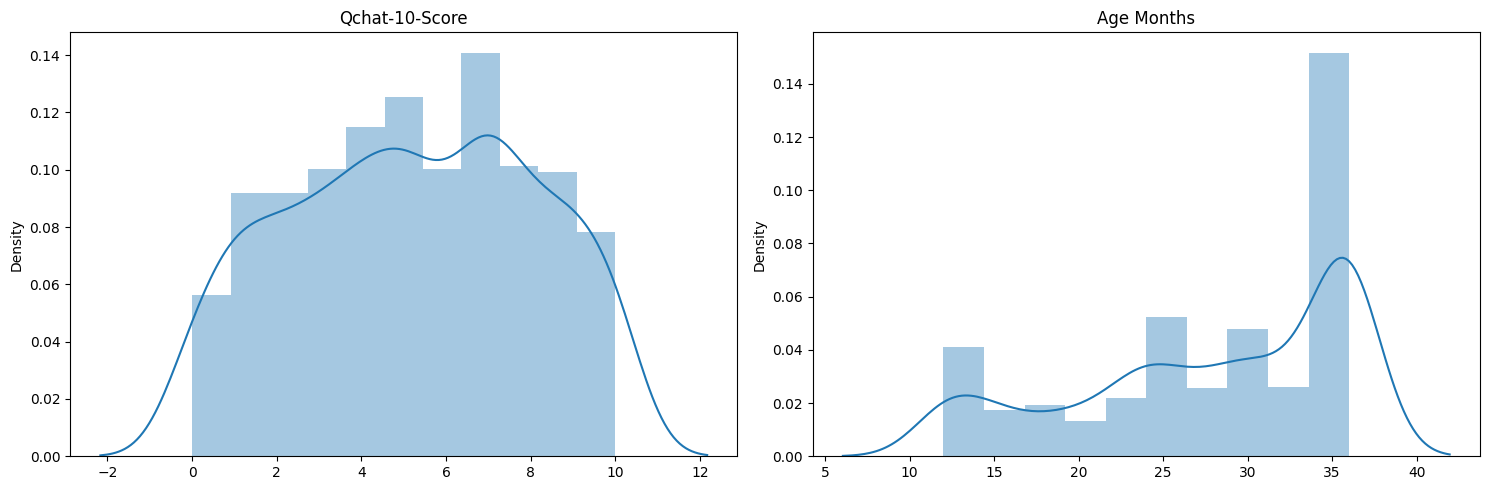

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes = axes.ravel()
for i, col in enumerate(num_df.iloc[:, 10:]):
    sns.distplot(x=num_df[col], ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

# Multivariate Analysis

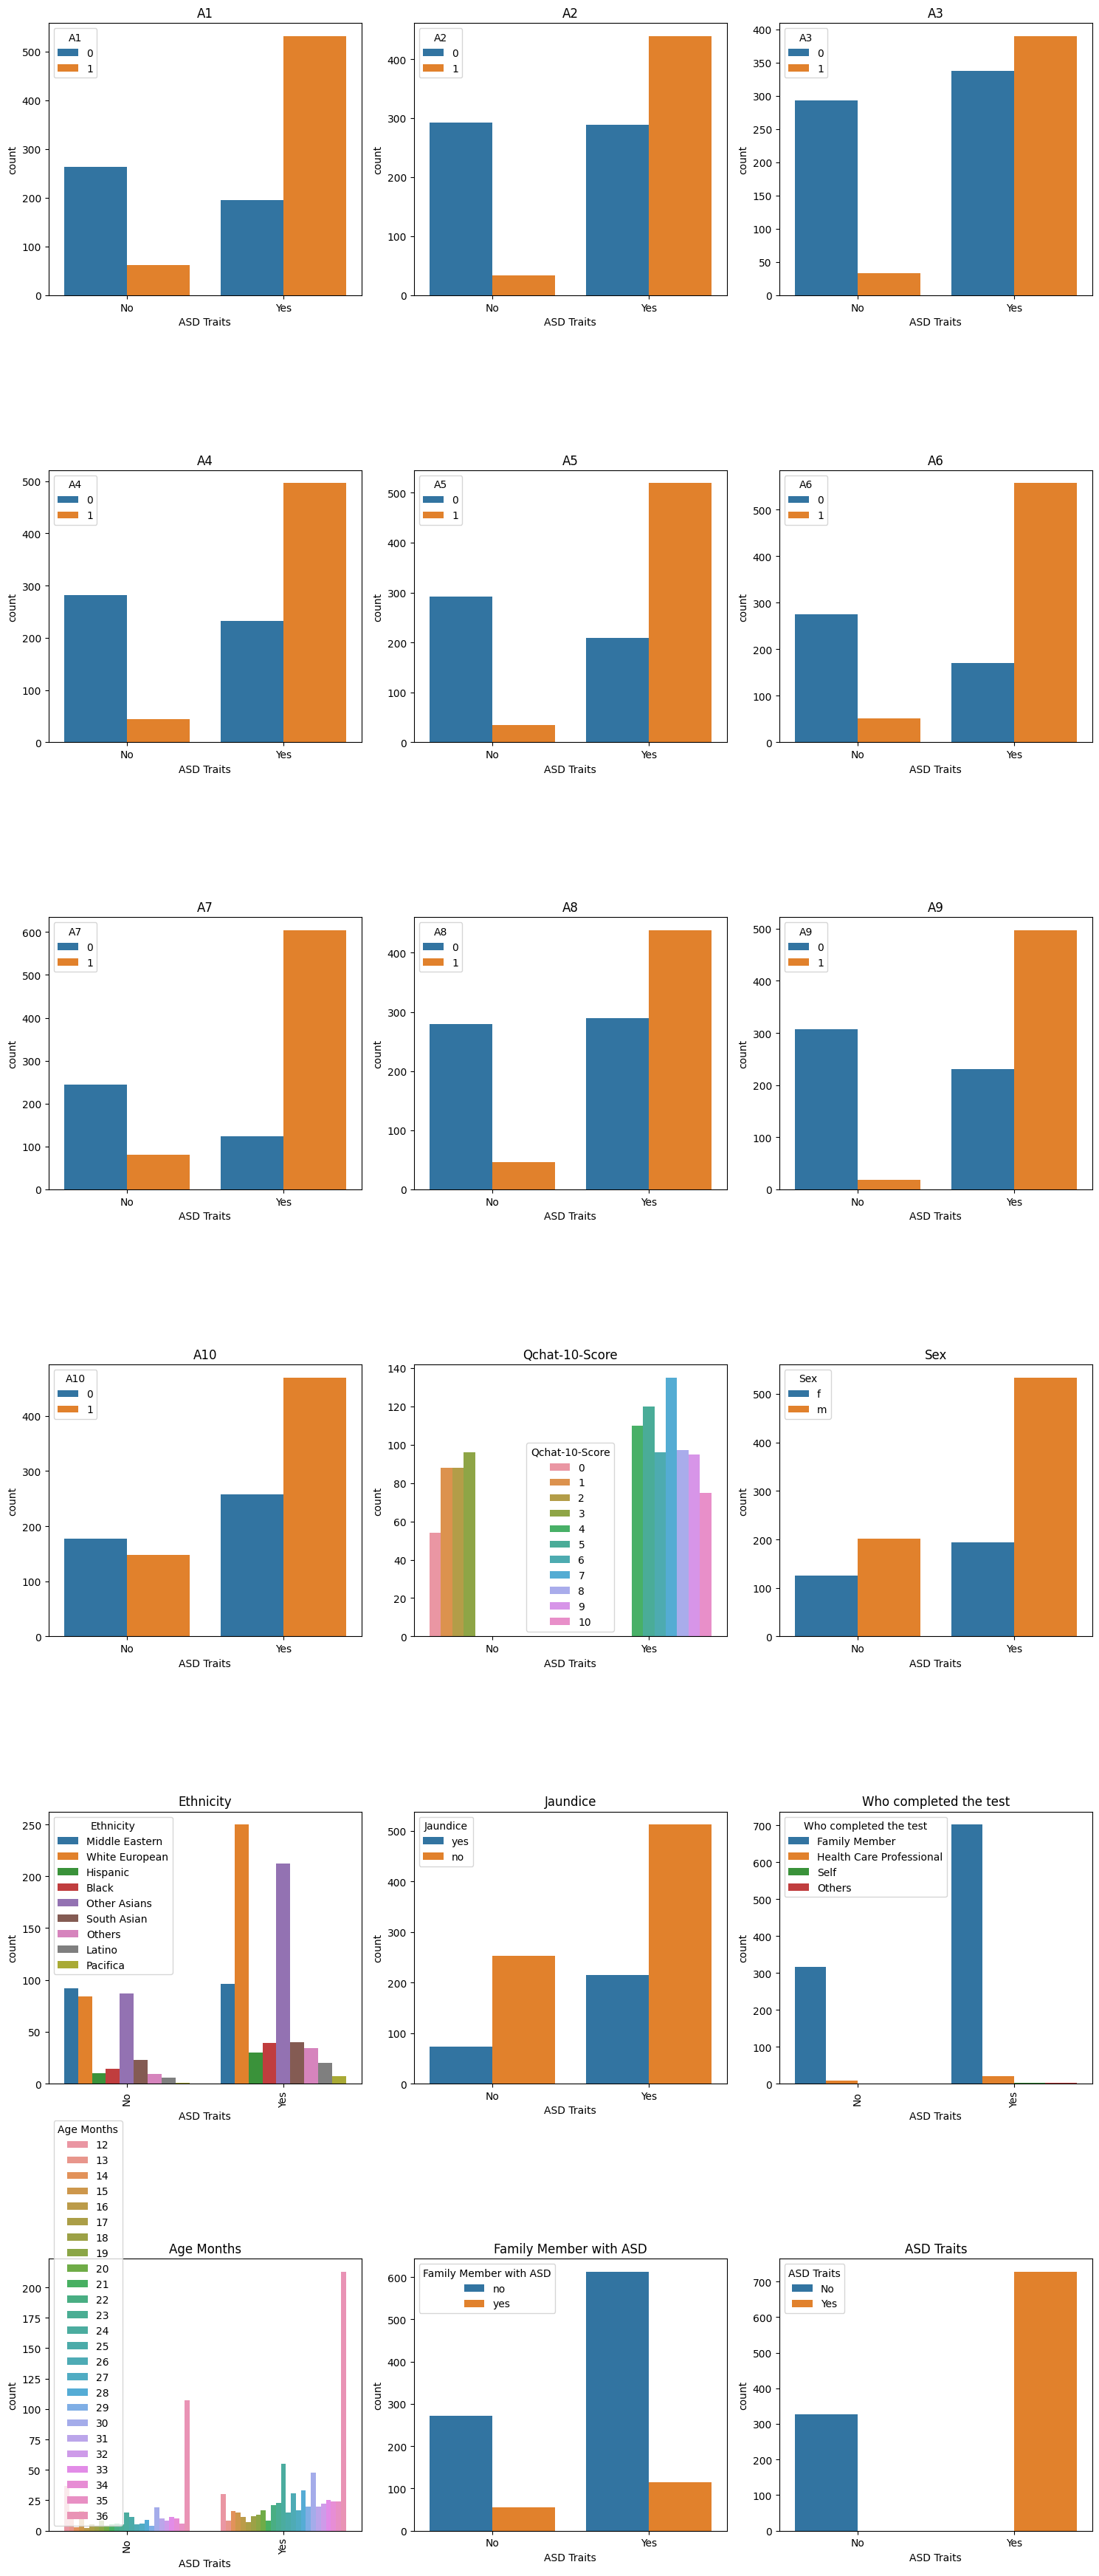

In [26]:
fig, axes = plt.subplots(6, 3, figsize=(15, 35))

axes = axes.ravel()
for i, col in enumerate(df.columns):
    sns.countplot(x=df["ASD Traits"], hue=df[col], ax=axes[i])
    axes[i].set_title(col)
    if col == "Who completed the test" or col == "Ethnicity" or col == "Age Months":
        axes[i].tick_params(axis="x", labelrotation=90)
plt.tight_layout()
plt.show()

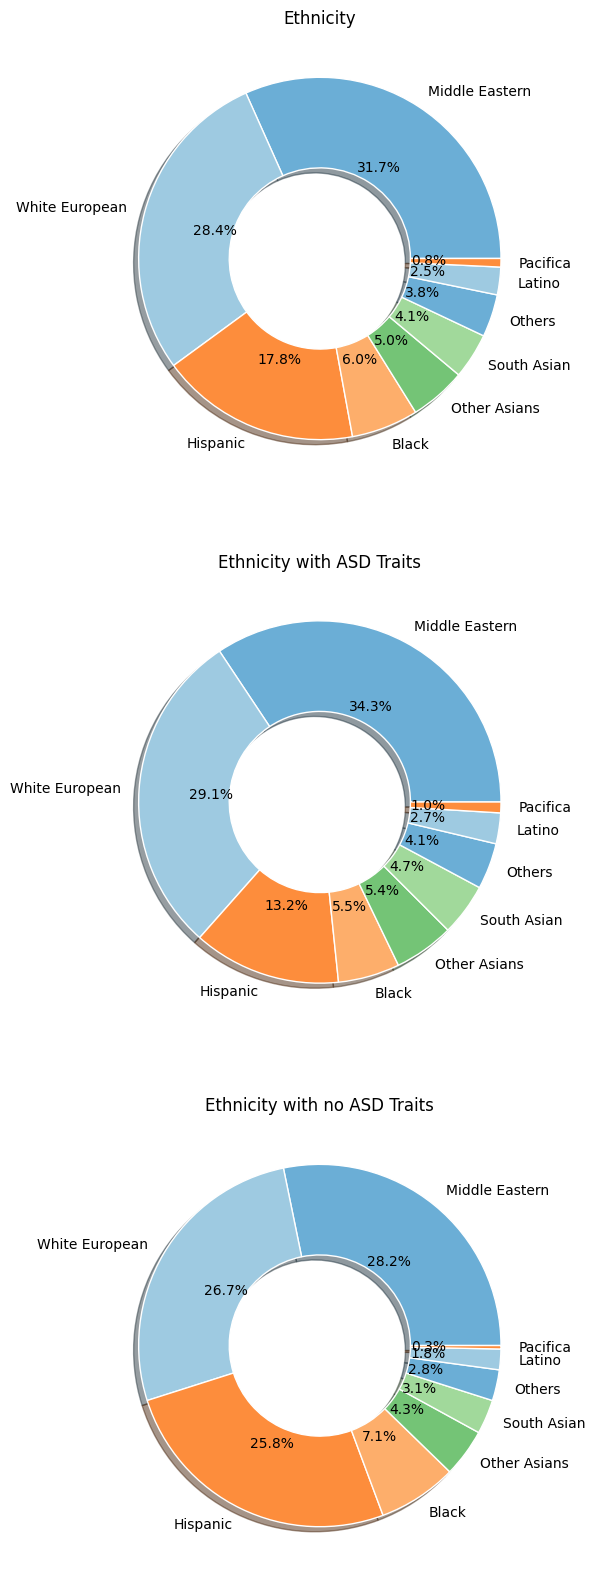

In [27]:
fig, ax = plt.subplots(3, 1, figsize=(20, 20))

size = 0.5
eth_vals = df["Ethnicity"].value_counts()
labels_eth =  ['Middle Eastern', 'White European', 'Hispanic', 'Black',
       'Other Asians ', 'South Asian', 'Others', 'Latino',
       'Pacifica']

yes = df[df["ASD Traits"]=="Yes"]["Ethnicity"].value_counts()
no = df[df["ASD Traits"]=="No"]["Ethnicity"].value_counts()


asd_vals = df["ASD Traits"].value_counts()
labels_asd = ['No', 'Yes']
cmap = plt.colormaps["tab20c"]


outer_colors = cmap([1, 2, 5, 6, 9, 10])


ax[0].pie(eth_vals, radius=1, colors=outer_colors, labels=labels_eth, autopct="%1.1f%%", shadow=True,
       wedgeprops=dict(width=size, edgecolor='w'))
ax[0].set_title("Ethnicity")
ax[1].pie(yes, radius=1, colors=outer_colors, labels=labels_eth, autopct="%1.1f%%", shadow=True,
       wedgeprops=dict(width=size, edgecolor='w'))
ax[1].set_title("Ethnicity with ASD Traits")

ax[2].pie(no, radius=1, colors=outer_colors, labels=labels_eth, autopct="%1.1f%%", shadow=True,
       wedgeprops=dict(width=size, edgecolor='w'))
ax[2].set_title("Ethnicity with no ASD Traits")


plt.show()

C:\Users\Babar\AppData\Local\Temp\ipykernel_6712\2386639678.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[df["ASD Traits"]=="Yes"]["Qchat-10-Score"], label="Yes", ax=axes[0, 0])
C:\Users\Babar\AppData\Local\Temp\ipykernel_6712\2386639678.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dist

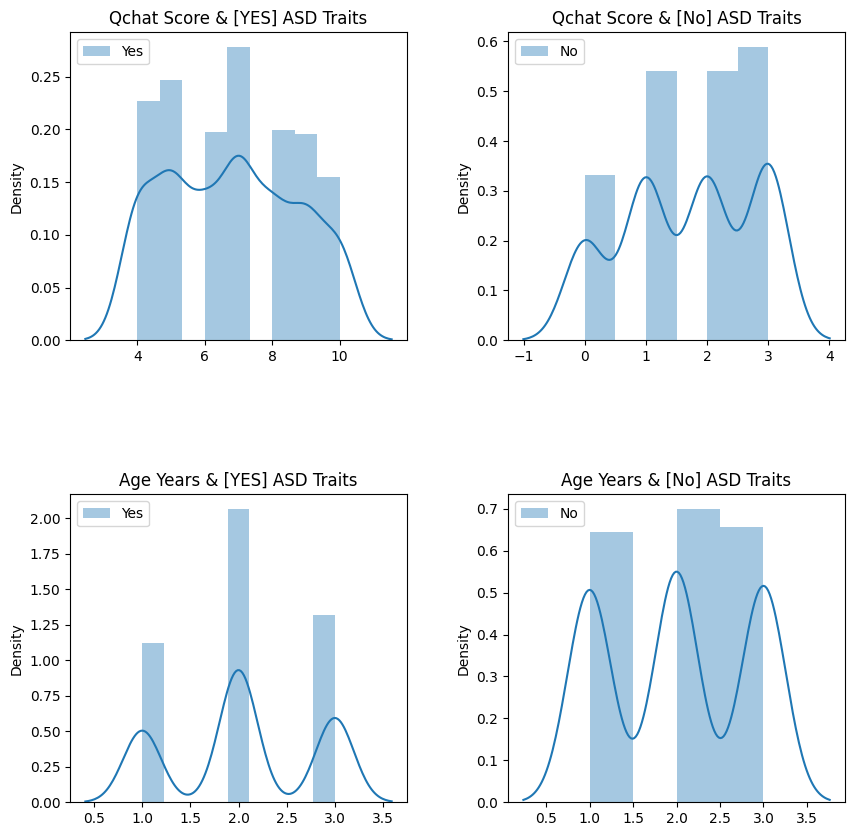

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
sns.distplot(x=df[df["ASD Traits"]=="Yes"]["Qchat-10-Score"], label="Yes", ax=axes[0, 0])
axes[0, 0].set_title("Qchat Score & [YES] ASD Traits")
axes[0, 0].legend(loc="upper left")

sns.distplot(x=df[df["ASD Traits"]=="No"]["Qchat-10-Score"], label="No", ax=axes[0, 1])
axes[0, 1].set_title("Qchat Score & [No] ASD Traits")
axes[0, 1].legend(loc="upper left")

sns.distplot(x=(df[df["ASD Traits"]=="Yes"]["Age Months"]/12).astype(int), label = "Yes", ax=axes[1, 0])
axes[1, 0].set_title("Age Years & [YES] ASD Traits")
axes[1, 0].legend(loc="upper left")

sns.distplot(x=(df[df["ASD Traits"]=="No"]["Age Months"]/12).astype(int), label="No", ax=axes[1, 1])
axes[1, 1].set_title("Age Years & [No] ASD Traits")
axes[1, 1].legend(loc="upper left")

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()


C:\Users\Babar\AppData\Local\Temp\ipykernel_6712\3478597804.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[df["ASD Traits"]=="Yes"]["Qchat-10-Score"], label="Yes", ax=axes[0])
C:\Users\Babar\AppData\Local\Temp\ipykernel_6712\3478597804.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

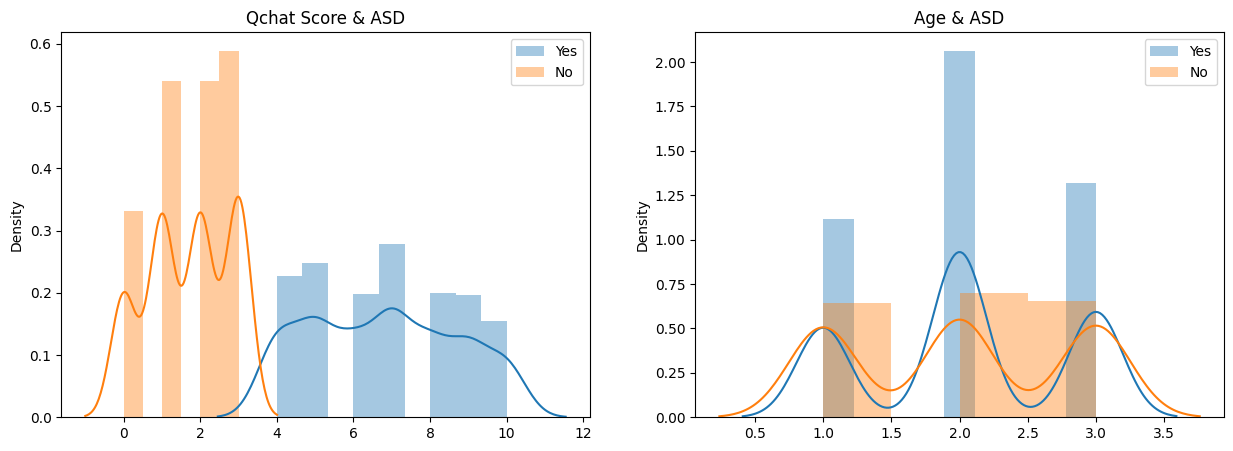

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(x=df[df["ASD Traits"]=="Yes"]["Qchat-10-Score"], label="Yes", ax=axes[0])
sns.distplot(x=df[df["ASD Traits"]=="No"]["Qchat-10-Score"], label="No", ax=axes[0])
axes[0].set_title("Qchat Score & ASD")
axes[0].legend(loc="upper right")

sns.distplot(x=(df[df["ASD Traits"]=="Yes"]["Age Months"]/12).astype(int), label = "Yes", ax=axes[1])
sns.distplot(x=(df[df["ASD Traits"]=="No"]["Age Months"]/12).astype(int), label="No", ax=axes[1])
axes[1].set_title("Age & ASD")
axes[1].legend(loc="upper right")
plt.show()


In [32]:
sex_ct = pd.crosstab(df["Sex"], df["ASD Traits"])
sex_ct

ASD Traits,No,Yes
Sex,,
f,125,194
m,201,534


In [33]:
pd.crosstab(df["Ethnicity"], df["ASD Traits"])

ASD Traits,No,Yes
Ethnicity,,
Black,14,39
Hispanic,10,30
Latino,6,20
Middle Eastern,92,96
Other Asians,87,212
Others,9,34
Pacifica,1,7
South Asian,23,40
White European,84,250


In [34]:
pd.crosstab(df["Jaundice"], df["ASD Traits"])

ASD Traits,No,Yes
Jaundice,,
no,253,513
yes,73,215


In [35]:
cat_df.columns

Index(['Sex', 'Ethnicity', 'Jaundice', 'Who completed the test',
       'Family Member with ASD', 'ASD Traits'],
      dtype='object')

In [36]:
pd.crosstab(df["Who completed the test"], df["ASD Traits"])

ASD Traits,No,Yes
Who completed the test,,
Family Member,316,702
Health Care Professional,9,20
Others,0,3
Self,1,3


In [37]:
pd.crosstab(df["Family Member with ASD"], df["ASD Traits"])

ASD Traits,No,Yes
Family Member with ASD,,
no,271,613
yes,55,115


In [38]:
pd.crosstab(df["Age Months"], df["ASD Traits"]).head()

ASD Traits,No,Yes
Age Months,,
12,37,30
13,10,8
14,3,16
15,16,15
16,2,11


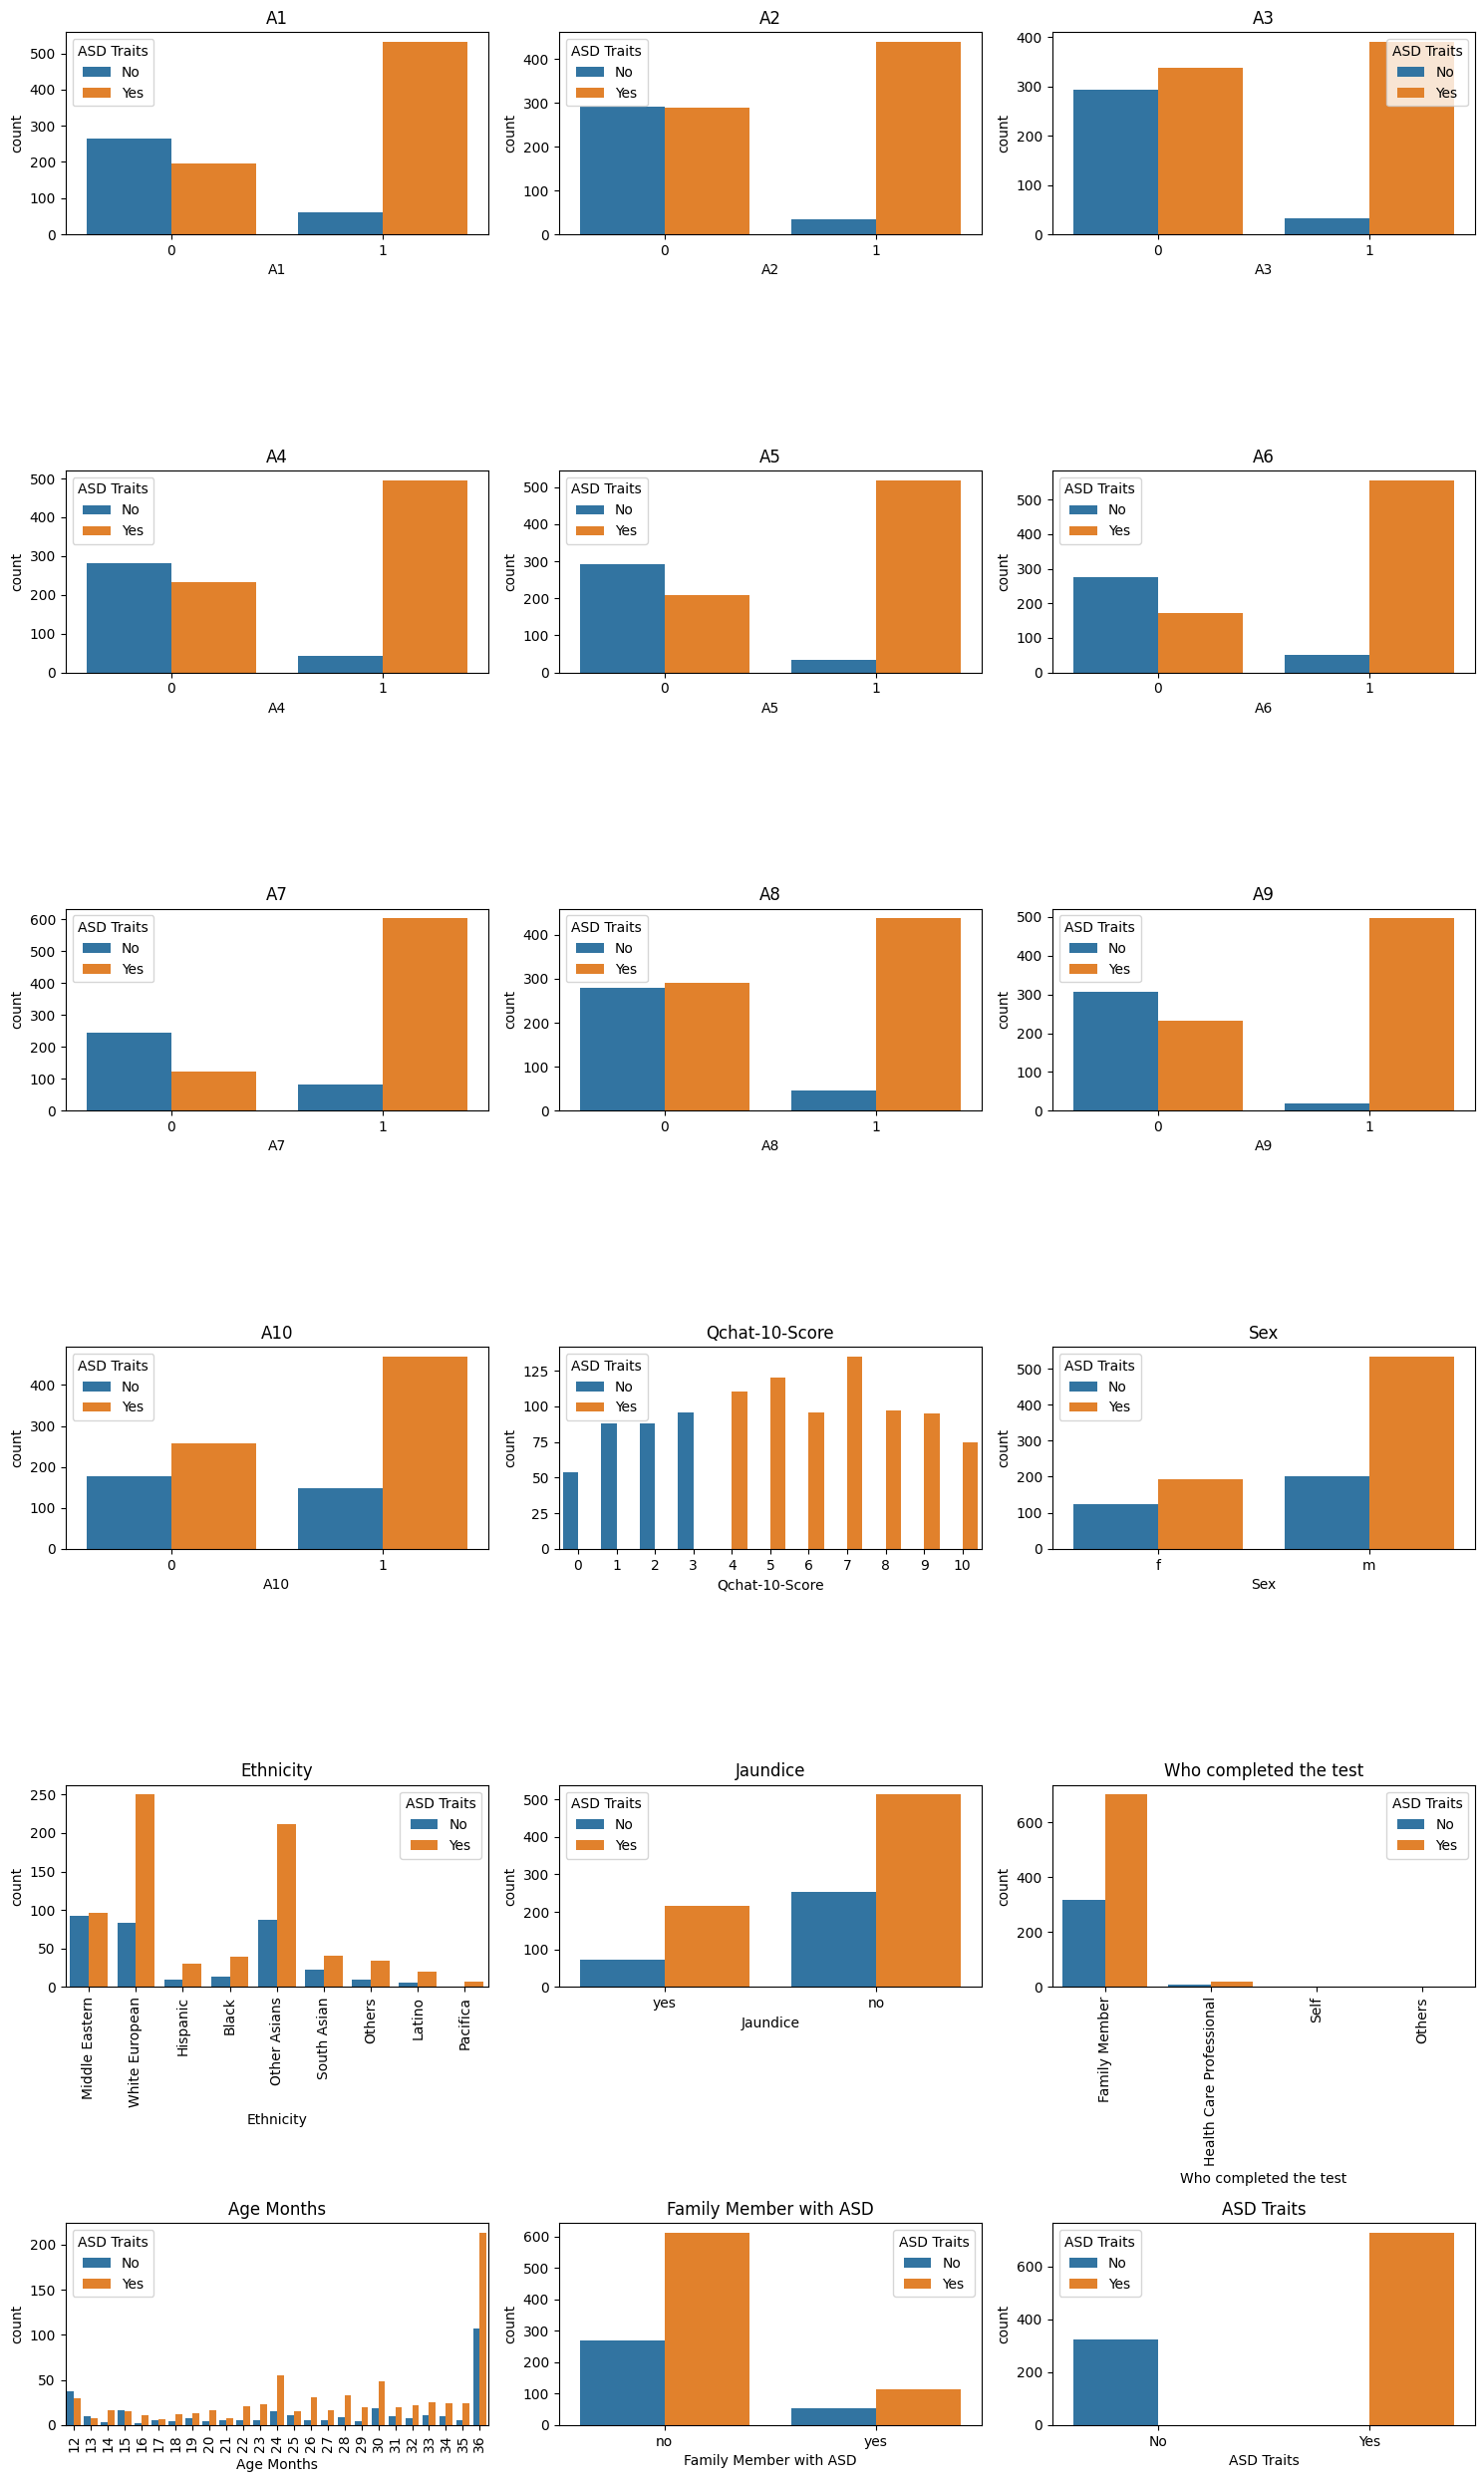

In [42]:
fig, axes = plt.subplots(6, 3, figsize=(15, 25)) 

axes = axes.ravel()
for i, col in enumerate(df.columns):
    sns.countplot(x=df[col], hue=df["ASD Traits"], ax=axes[i])
    axes[i].set_title(col)
    if col == 'Ethnicity' or col == "Who completed the test" or col == "Age Months":
        # Rotate the x-axis labels by 90 degrees
        axes[i].tick_params(axis='x', labelrotation=90)
plt.tight_layout()
plt.show()

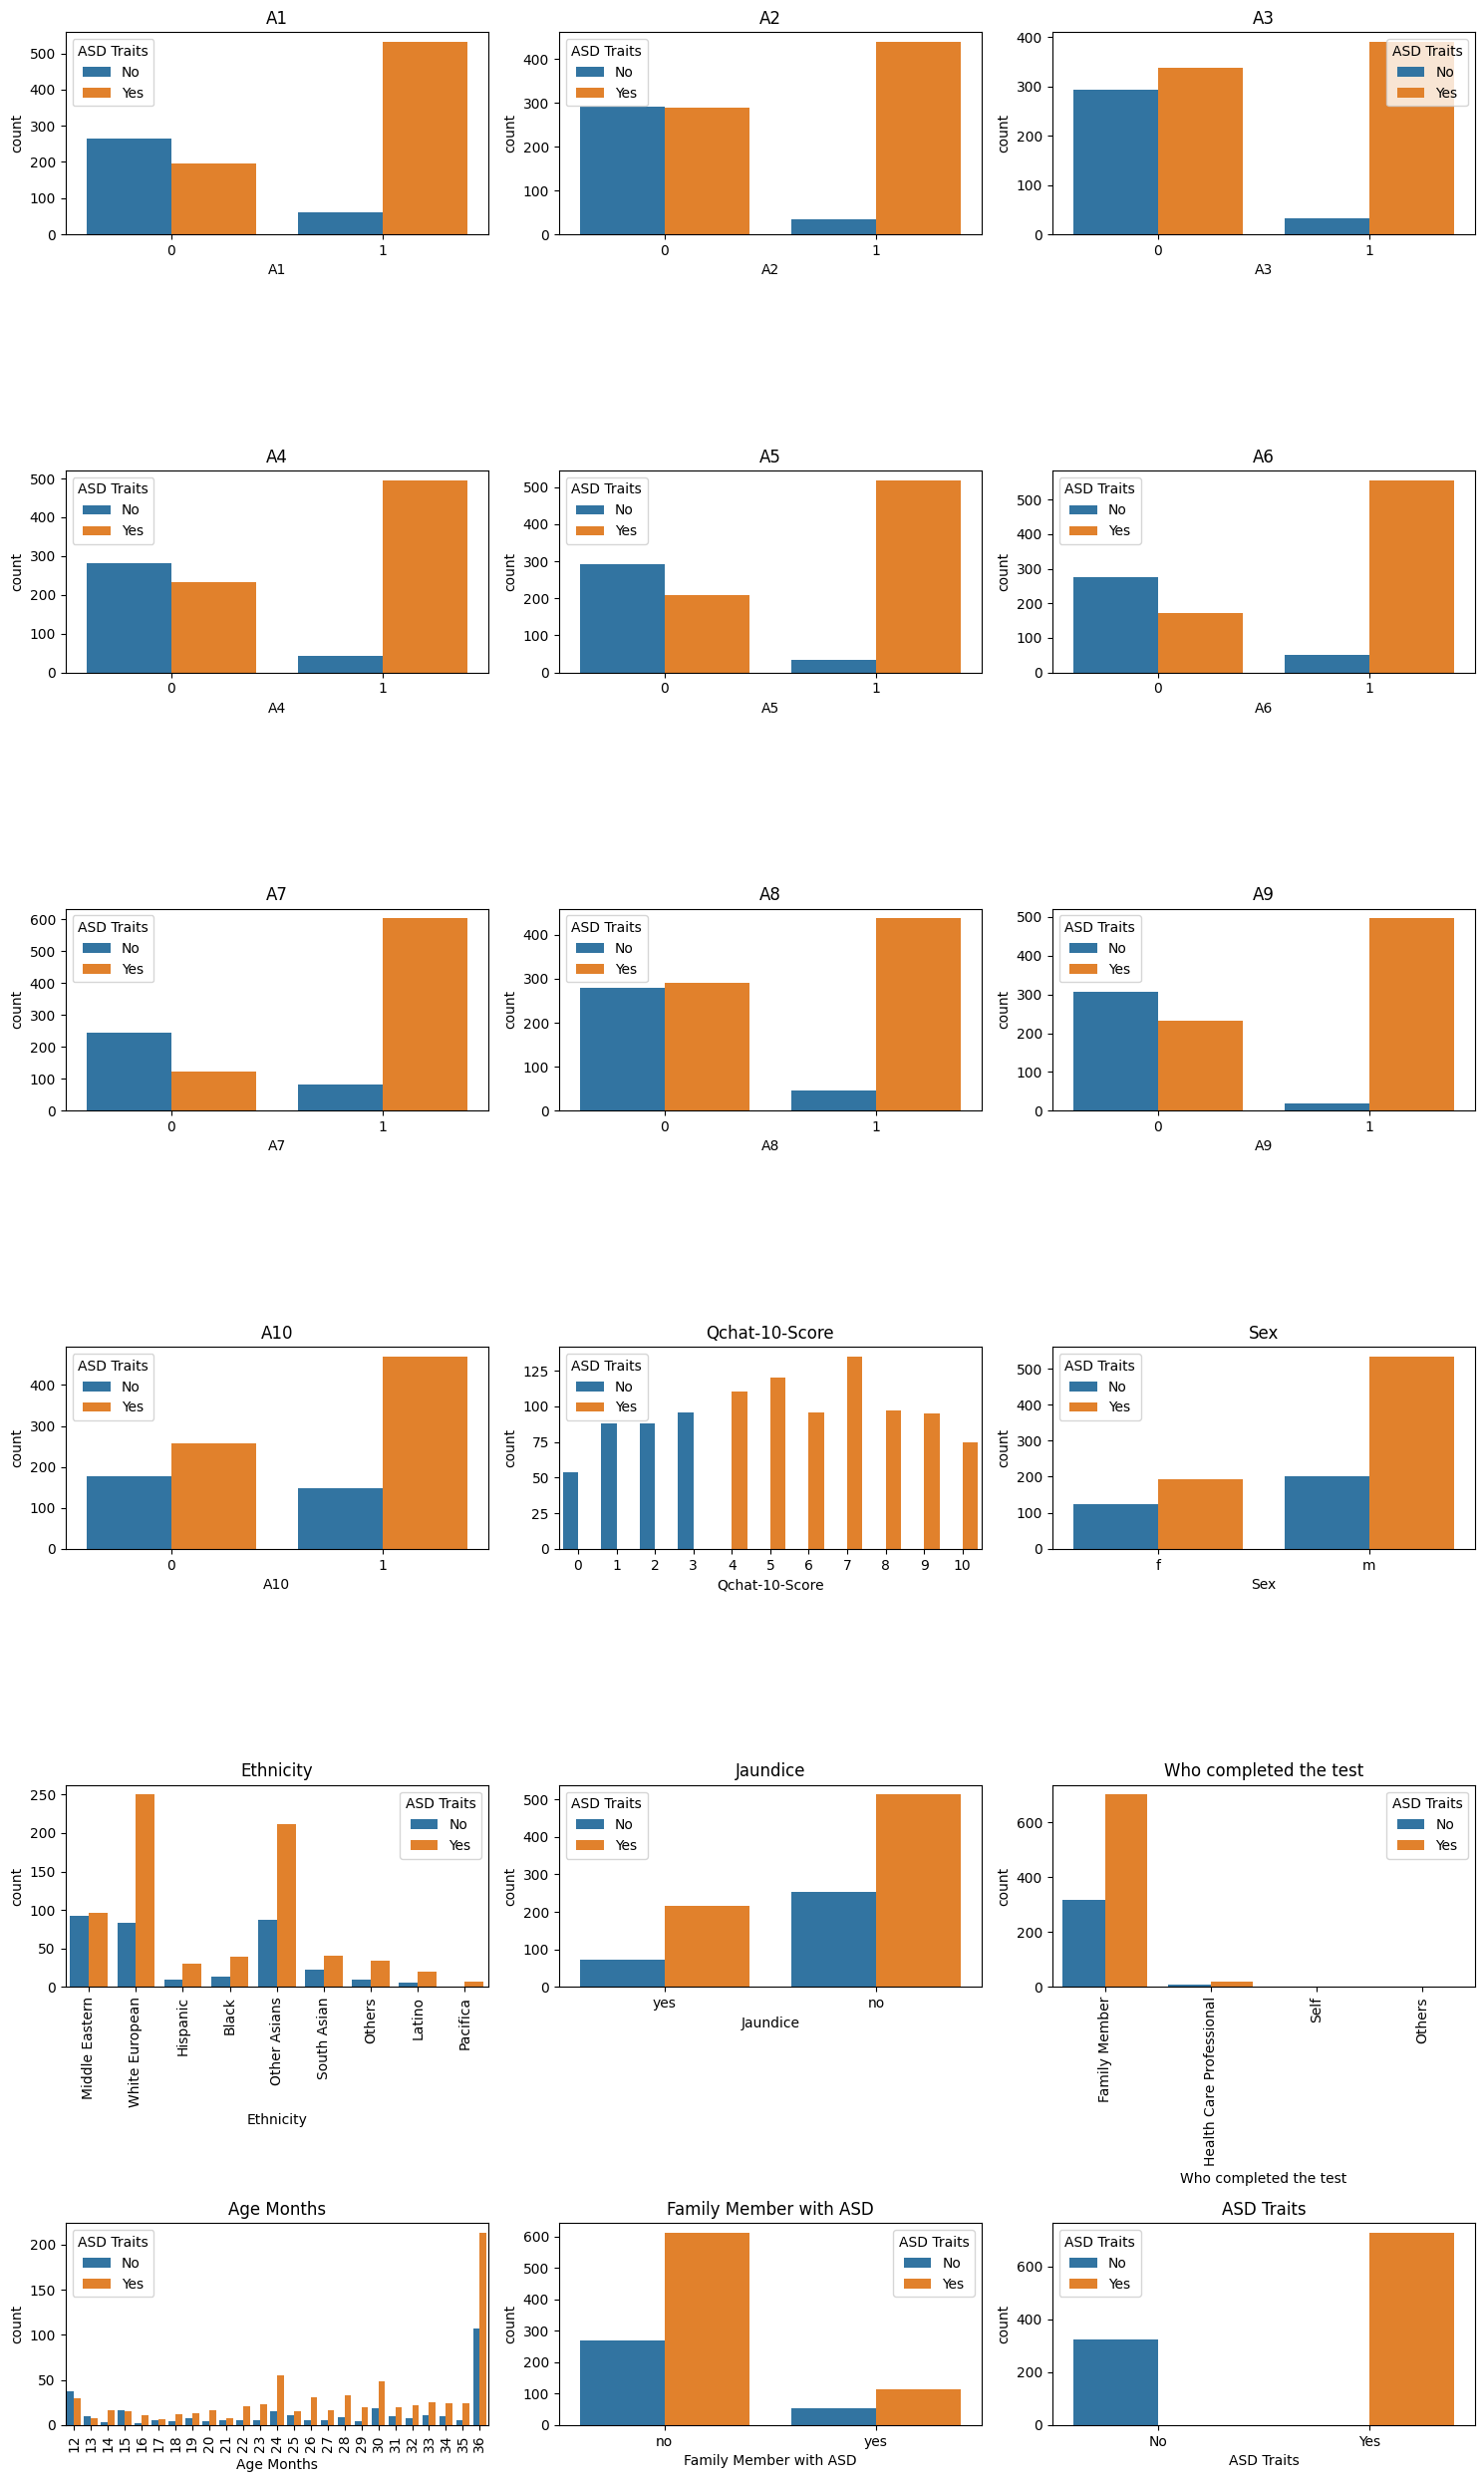

In [ ]:
fig, axes = plt.subplots(6, 3, figsize=(15, 25)) 

axes = axes.ravel()
for i, col in enumerate(df.columns):
    sns.countplot(x=df[col], hue=df["ASD Traits"], ax=axes[i])
    axes[i].set_title(col)
    if col == 'Ethnicity' or col == "Who completed the test" or col == "Age Months":
        # Rotate the x-axis labels by 90 degrees
        axes[i].tick_params(axis='x', labelrotation=90)
plt.tight_layout()
plt.show()

In [43]:
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Who completed the test', 'Age Months', 'Family Member with ASD',
       'ASD Traits'],
      dtype='object')

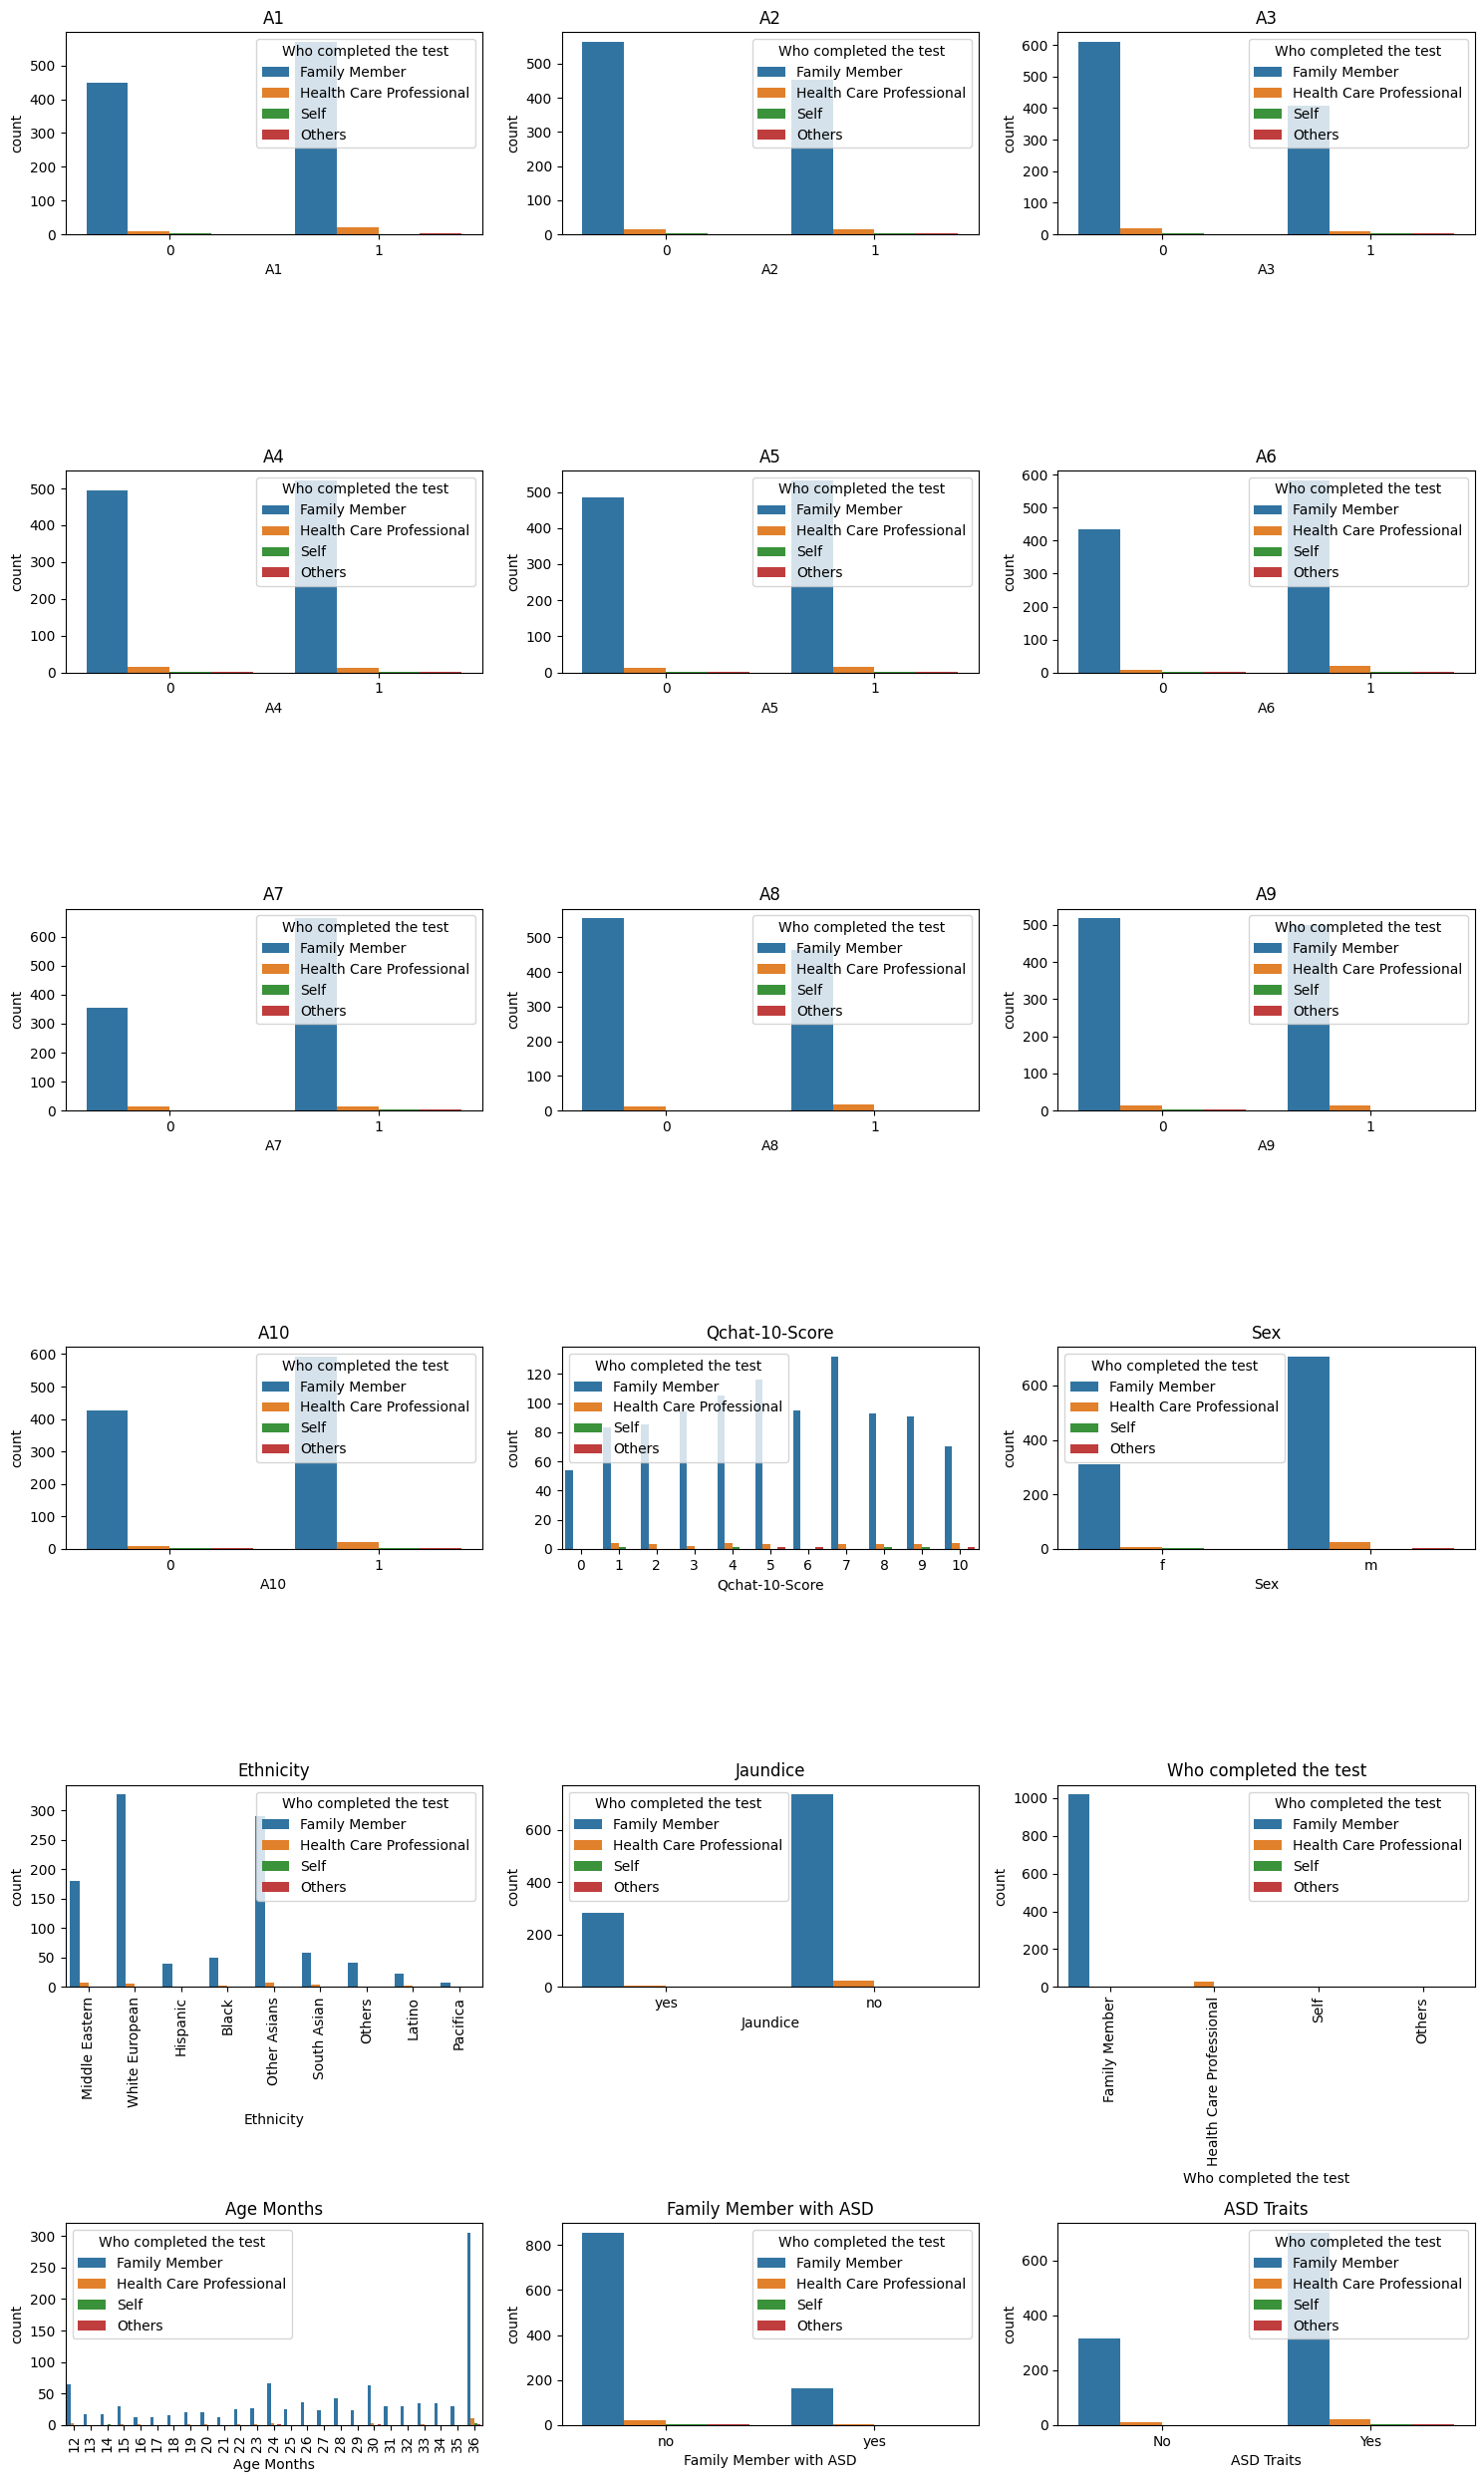

In [46]:
fig, axes = plt.subplots(6, 3, figsize=(15, 25)) 

axes = axes.ravel()
for i, col in enumerate(df.columns):
    sns.countplot(x=df[col], hue=df["Who completed the test"], ax=axes[i])
    axes[i].set_title(col)
    if col == 'Ethnicity' or col == "Who completed the test" or col == "Age Months":
        # Rotate the x-axis labels by 90 degrees
        axes[i].tick_params(axis='x', labelrotation=90)
plt.tight_layout()
plt.show()

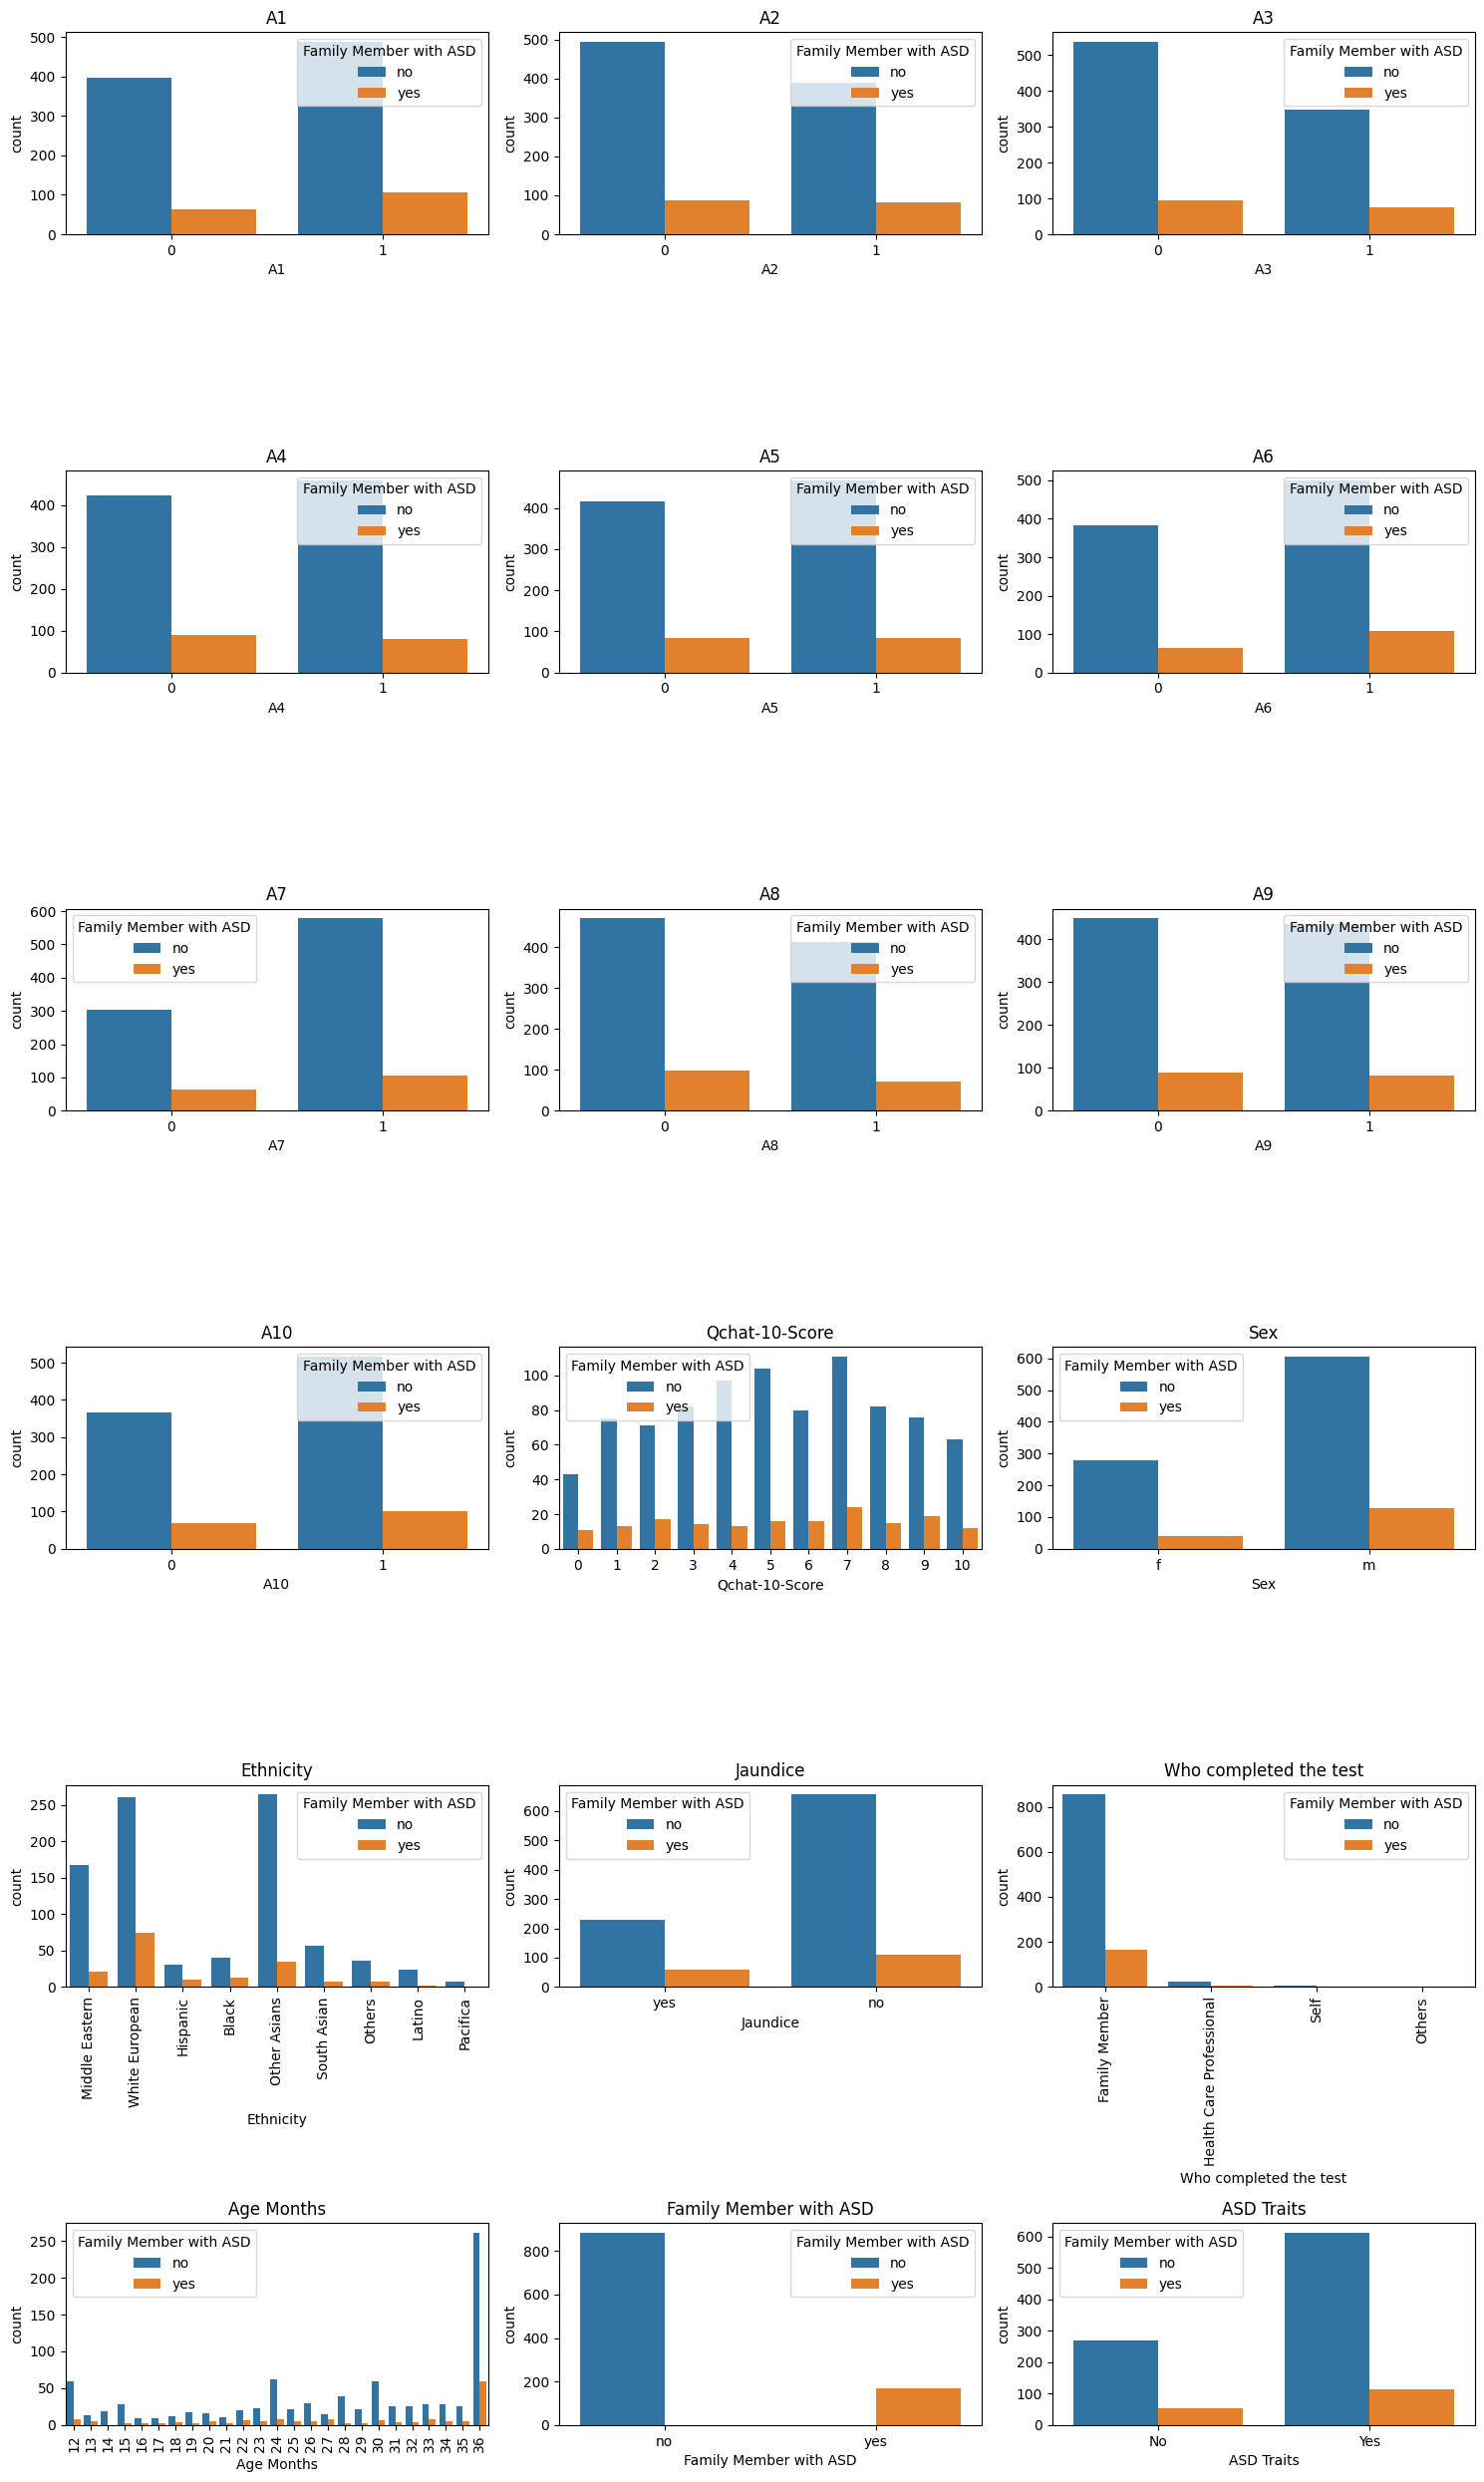

In [47]:
fig, axes = plt.subplots(6, 3, figsize=(15, 25)) 

axes = axes.ravel()
for i, col in enumerate(df.columns):
    sns.countplot(x=df[col], hue=df["Family Member with ASD"], ax=axes[i])
    axes[i].set_title(col)
    if col == 'Ethnicity' or col == "Who completed the test" or col == "Age Months":
        # Rotate the x-axis labels by 90 degrees
        axes[i].tick_params(axis='x', labelrotation=90)
plt.tight_layout()
plt.show()

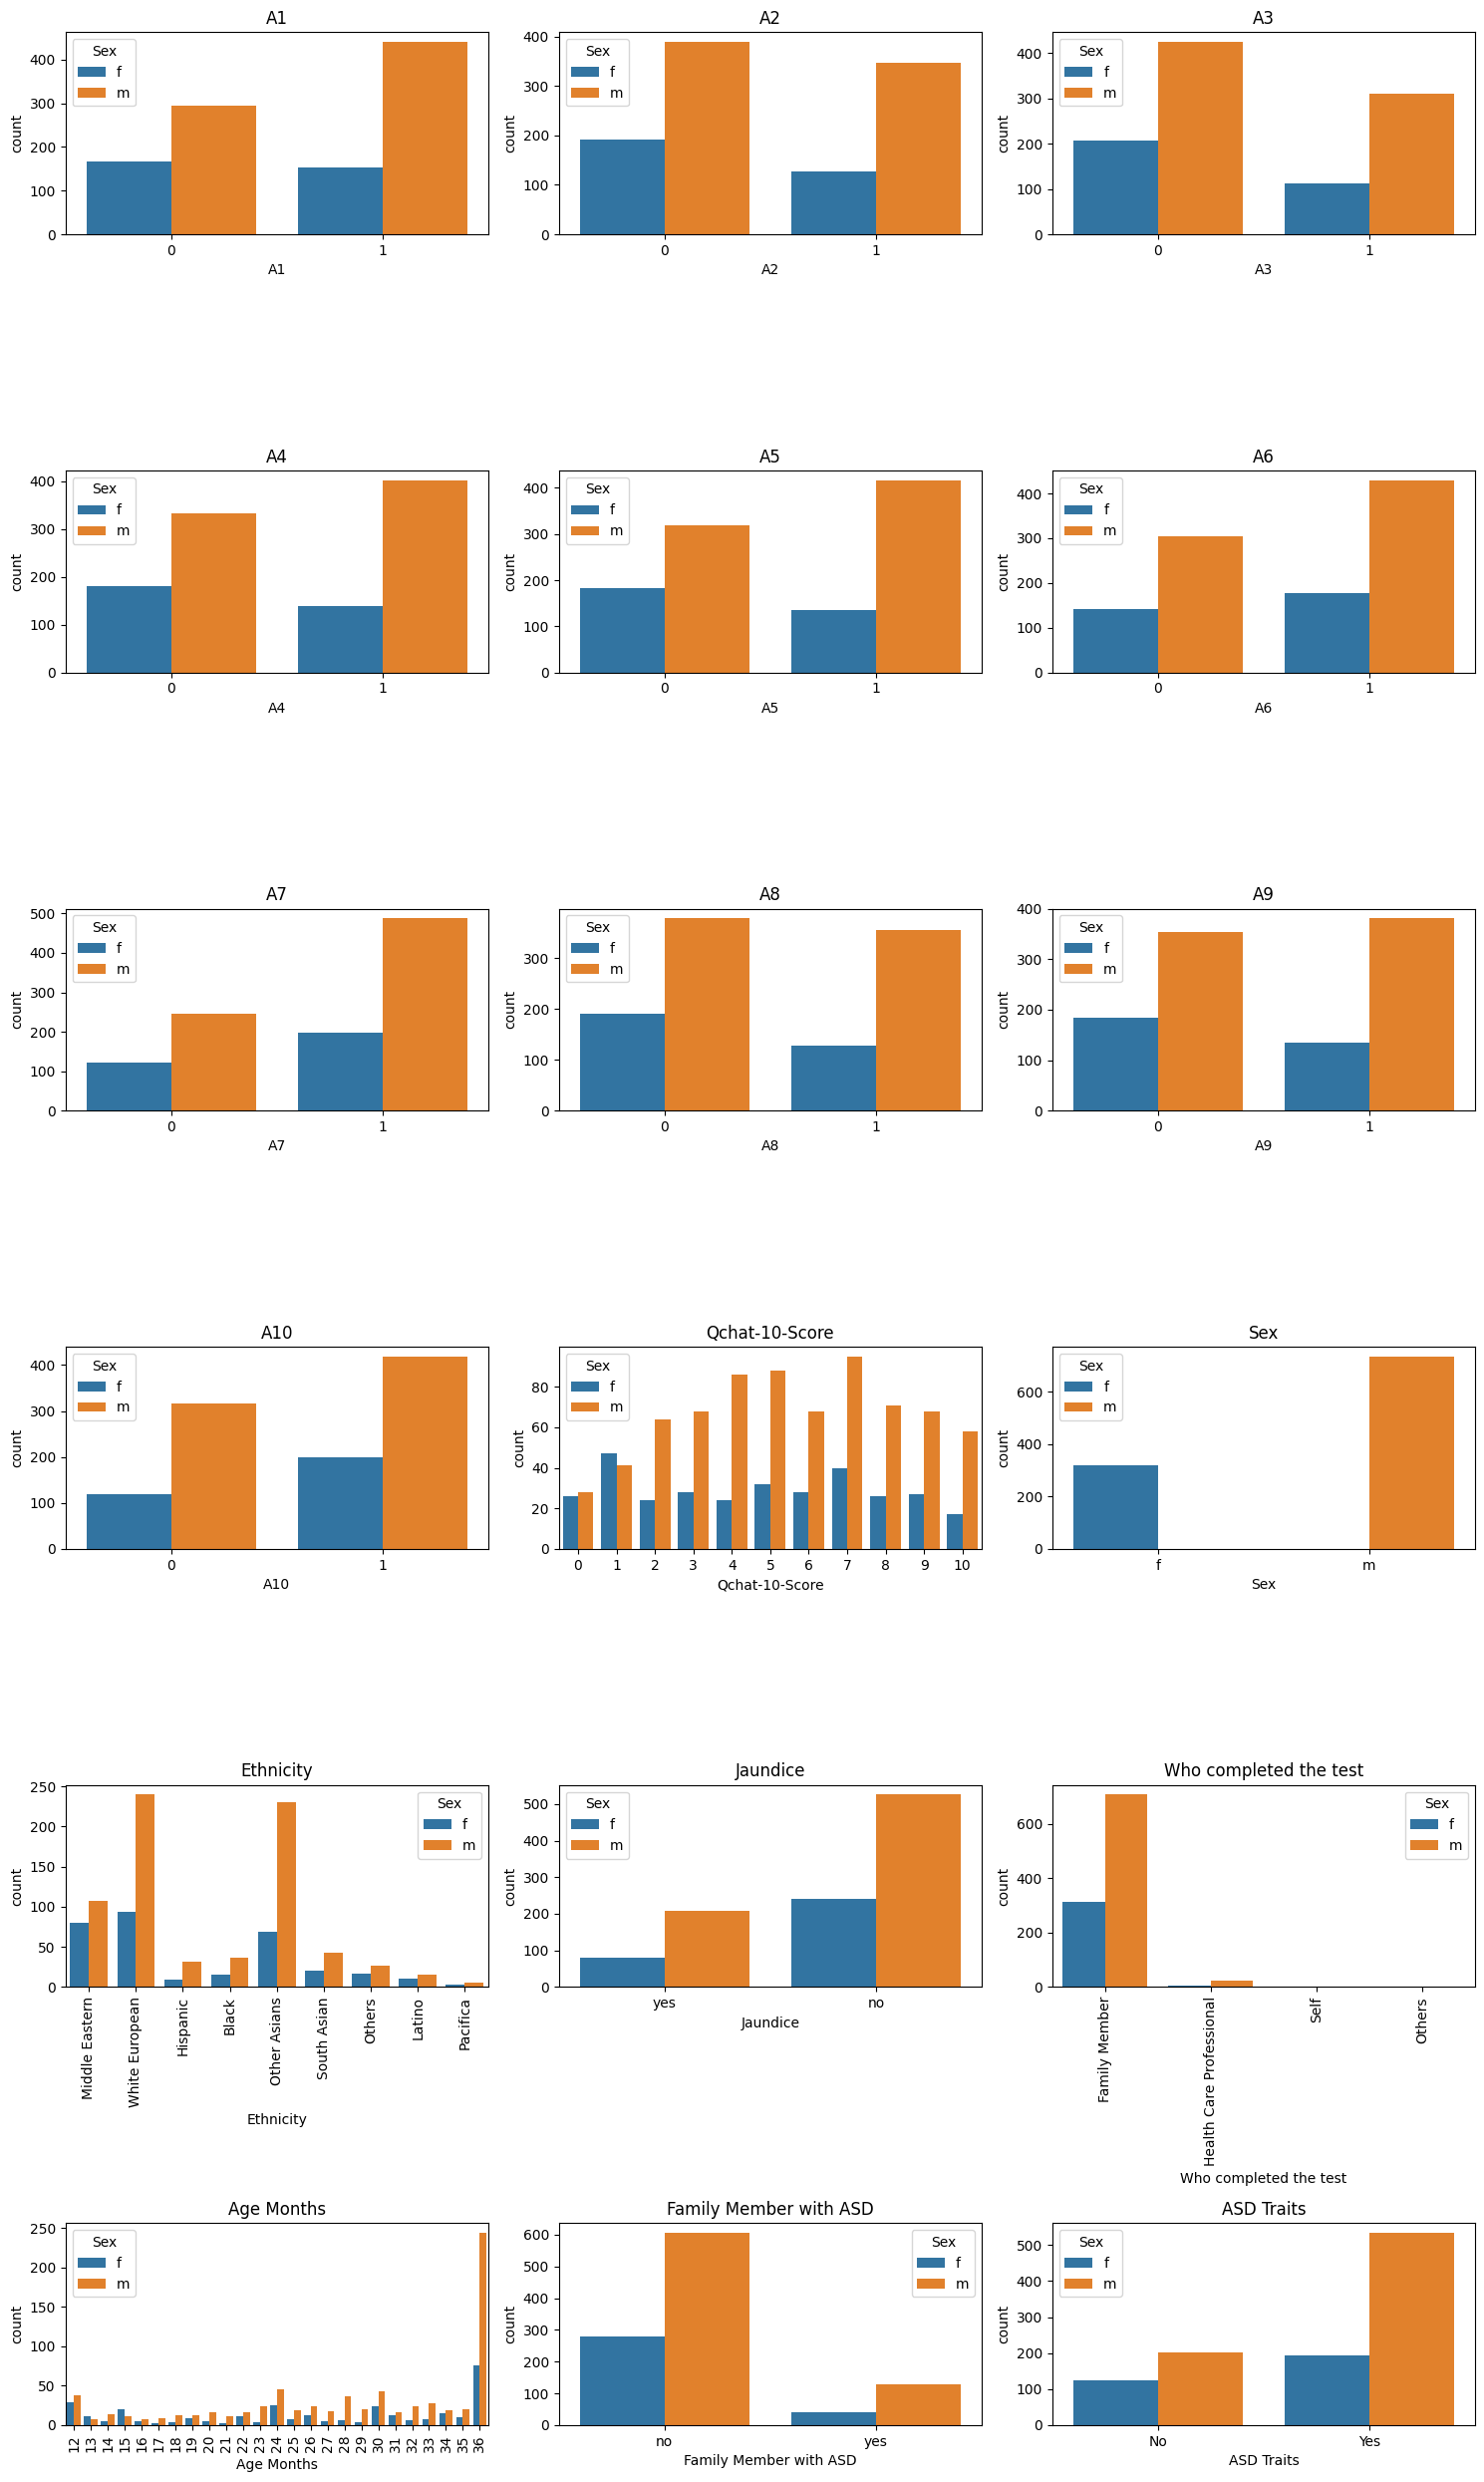

In [48]:
fig, axes = plt.subplots(6, 3, figsize=(15, 25)) 

axes = axes.ravel()
for i, col in enumerate(df.columns):
    sns.countplot(x=df[col], hue=df["Sex"], ax=axes[i])
    axes[i].set_title(col)
    if col == 'Ethnicity' or col == "Who completed the test" or col == "Age Months":
        # Rotate the x-axis labels by 90 degrees
        axes[i].tick_params(axis='x', labelrotation=90)
plt.tight_layout()
plt.show()

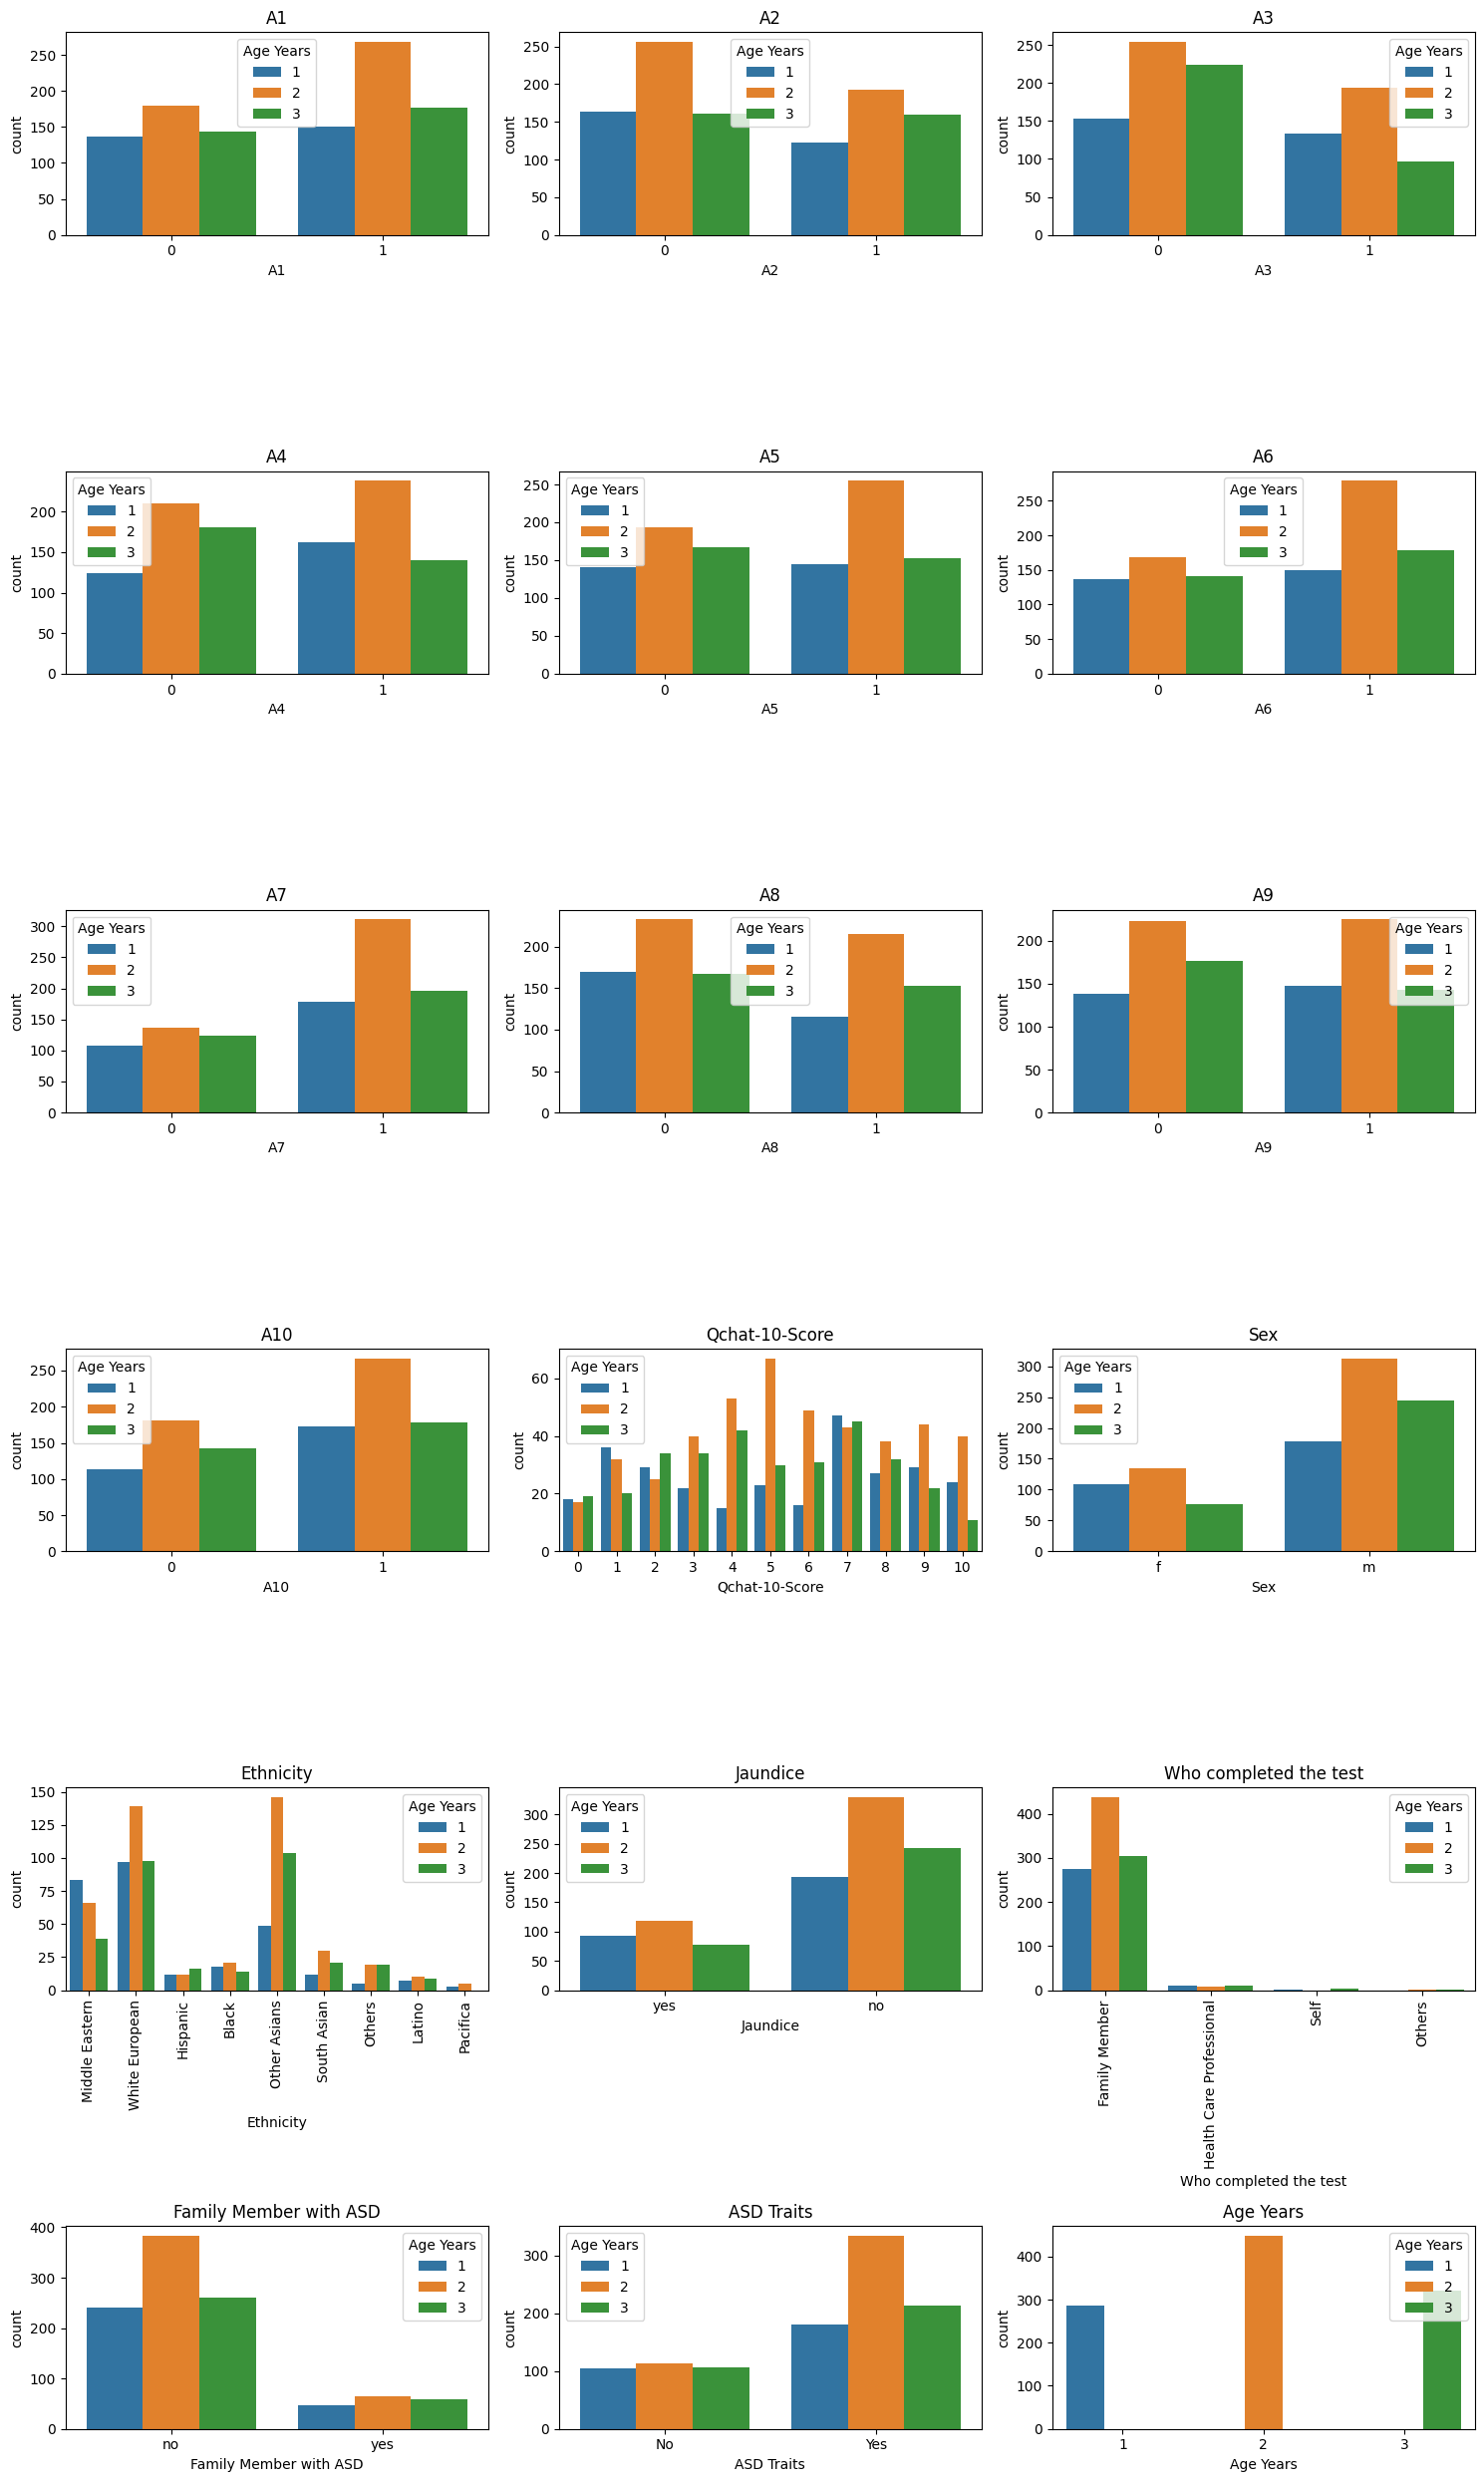

In [49]:
df["Age Years"] = (df["Age Months"] / 12).astype(int)
df.drop(columns=["Age Months"], axis=1, inplace=True)
fig, axes = plt.subplots(6, 3, figsize=(15, 25)) 

axes = axes.ravel()
for i, col in enumerate(df.columns):
    sns.countplot(x=df[col], hue=df["Age Years"], ax=axes[i])
    axes[i].set_title(col)
    if col == 'Ethnicity' or col == "Who completed the test" or col == "Age Months":
        # Rotate the x-axis labels by 90 degrees
        axes[i].tick_params(axis='x', labelrotation=90)
plt.tight_layout()
plt.show()